In [91]:
# Reperforming K Means without outlier treatment and combining data frames
# After the first attempt, I realized the playlist data frame does not give much information
# Using the general dataset without any outlier treatment
# Predicting Genre by K-cluster Means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from kneed import KneeLocator, DataGenerator as dg



In [92]:
# Load the files
genre = pd.read_csv('genres_v2.csv')
playlist = pd.read_csv('playlists.csv')

C:\Users\chimi\AppData\Local\Temp\ipykernel_2216\865617657.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genre = pd.read_csv('genres_v2.csv')


In [93]:
# Display rows and columns
nums_rows = genre.shape[0] , playlist.shape[0]
print('The number of rows are : ',nums_rows)
nums_cols = genre.shape[1], playlist.shape[1]
print('The number of rows are : ',nums_cols)

The number of rows are :  (42305, 39)
The number of rows are :  (22, 2)


In [94]:
genre.info(), playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

(None, None)

In [95]:
# Genre columns
genre.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [96]:
#PLaylist columns
playlist.columns

Index(['Playlist', 'Genre'], dtype='object')

In [97]:
# Display 5 rows of genre
genre.head(5)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [98]:
# Playlist by genre
playlist.head(5)

Playlist      Genre
0  19WuHd4MxWLzE1fpMmw4S4  Dark Trap
1  6XyR8uzgkSoDzHuOxxRtLH  Dark Trap
2  37Ij3ofyhvEhFEH8YZMZ2X  Dark Trap
3  07zTlfPpsxeoWdumbkNWMI  Dark Trap
4  2dClSRLsnptdkDQnpi5H2f  Dark Trap

In [99]:
# Rename Genre columns
genre.rename({'genre':'Genre'},inplace=True,axis=1)

In [100]:
# Drop unnecessary columns
genre.drop(columns=['uri','track_href','analysis_url','Unnamed: 0','title'],axis=1,inplace=True)

In [101]:
# Playlist duplicates
playlist.duplicated().sum()

0

In [102]:
# Genre missing values
genre.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
duration_ms             0
time_signature          0
Genre                   0
song_name           20786
dtype: int64

In [103]:
# Playlist missing values
playlist.isnull().sum()

Playlist    0
Genre       0
dtype: int64

In [104]:
# Drop song name feature
genre.drop('song_name',axis=1,inplace=True)

In [105]:
# Merge dataframes
genre = pd.merge(genre,playlist,on='Genre',how='inner')

In [106]:
# Use features listed on Spotify website
genre.head(5)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1         0.42        0.0598   
1         0.831   0.814    2    -7.364     1         0.42        0.0598   
2         0.831   0.814    2    -7.364     1         0.42        0.0598   
3         0.831   0.814    2    -7.364     1         0.42        0.0598   
4         0.831   0.814    2    -7.364     1         0.42        0.0598   

   instrumentalness  liveness  valence    tempo            type  \
0            0.0134    0.0556    0.389  156.985  audio_features   
1            0.0134    0.0556    0.389  156.985  audio_features   
2            0.0134    0.0556    0.389  156.985  audio_features   
3            0.0134    0.0556    0.389  156.985  audio_features   
4            0.0134    0.0556    0.389  156.985  audio_features   

                       id  duration_ms  time_signature      Genre  \
0  2Vc6NJ9PW9gD9q343XFRKx       124539               4  Dark Trap   
1  2Vc6NJ9PW9gD9q343XFRKx       124539               4  Dark Trap   
2  2Vc6NJ9PW9gD9q343XFRKx       124539               4  Dark Trap   
3  2Vc6NJ9PW9gD9q343XFRKx       124539               4  Dark Trap   
4  2Vc6NJ9PW9gD9q343XFRKx       124539               4  Dark Trap   

                 Playlist  
0  19WuHd4MxWLzE1fpMmw4S4  
1  6XyR8uzgkSoDzHuOxxRtLH  
2  37Ij3ofyhvEhFEH8YZMZ2X  
3  07zTlfPpsxeoWdumbkNWMI  
4  2dClSRLsnptdkDQnpi5H2f

<Figure size 800x550 with 0 Axes>

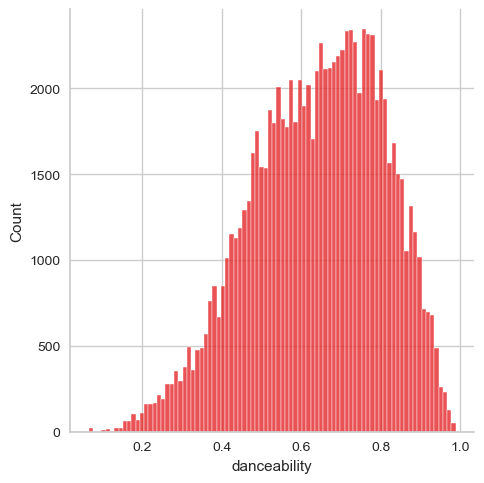

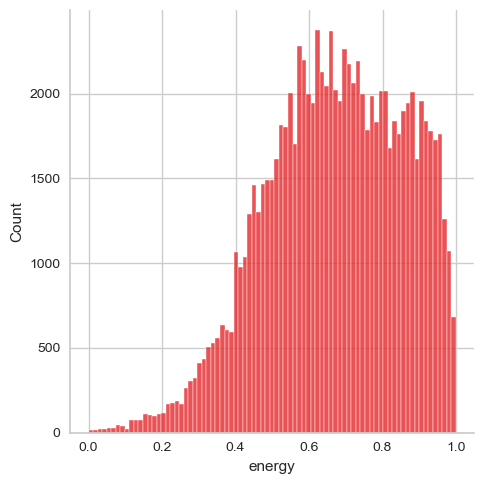

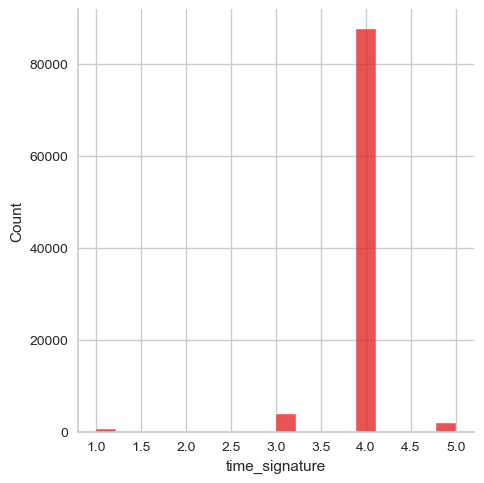

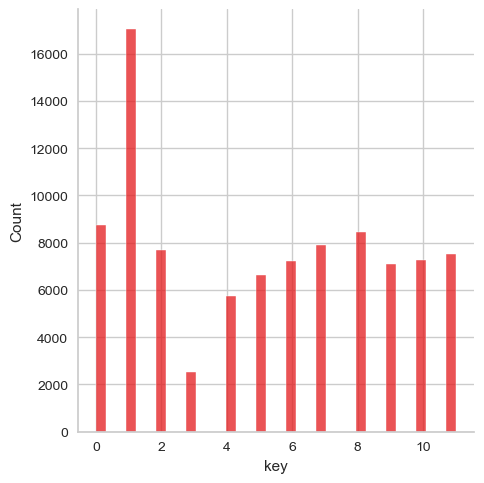

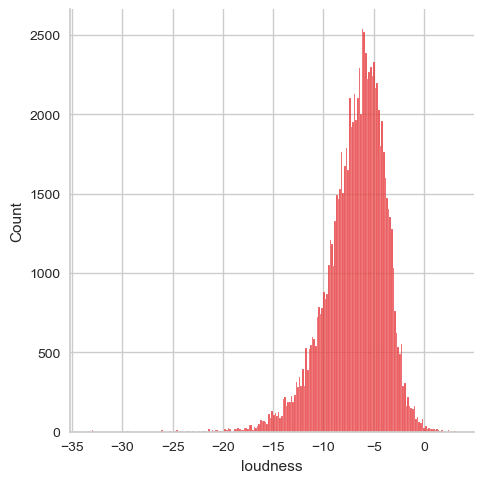

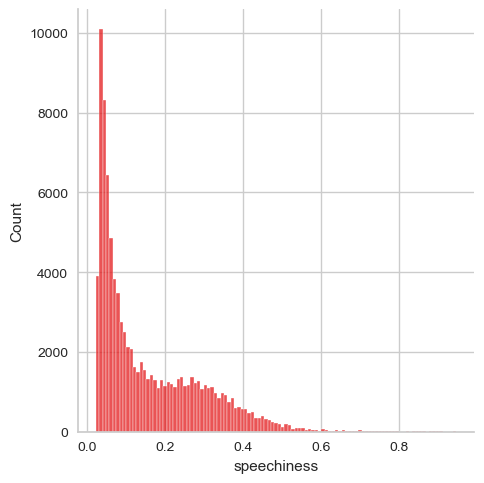

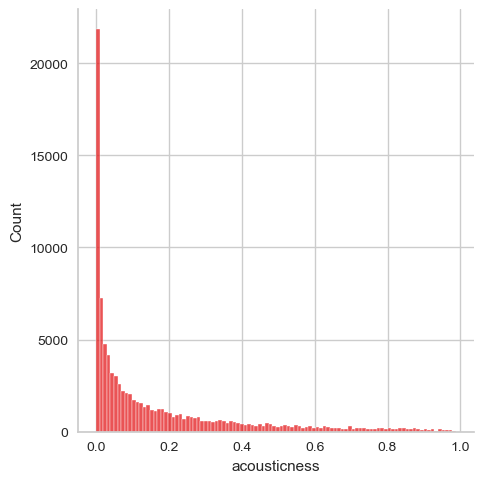

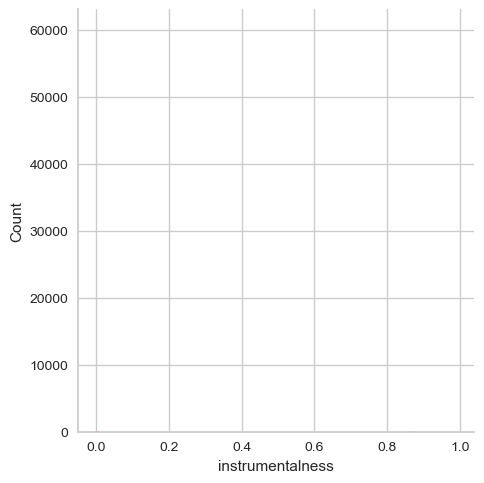

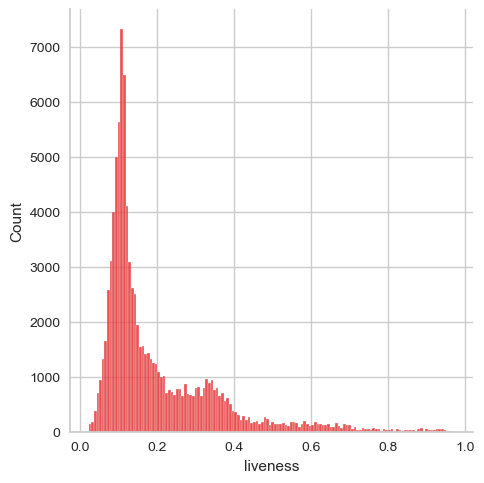

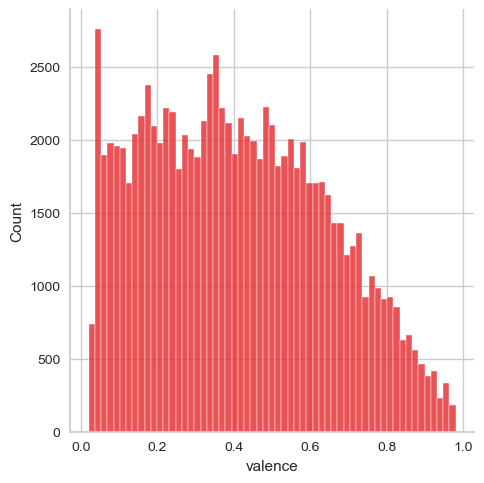

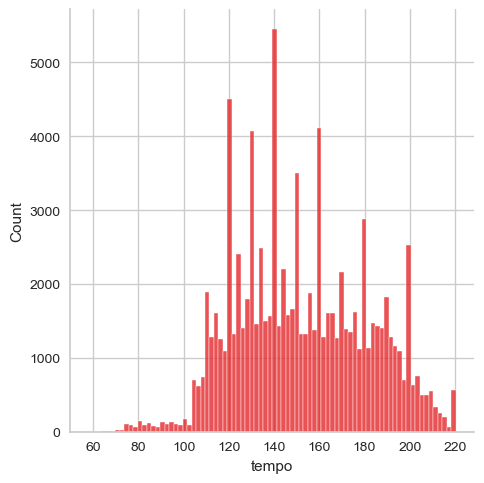

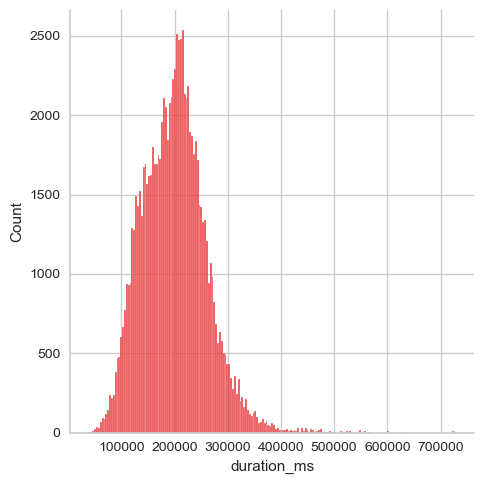

In [107]:
# Univariate analysis
#Keeping the outliers.Last time getting rid of the outliers gave us high inertia.
# Univariate analysis 
numerical_variables = genre[['danceability', 'energy','time_signature','key','loudness','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
for i, cols in enumerate(numerical_variables.columns):
    plt.figure(i)
    sns.displot(x=cols,data=genre,palette='Set1')

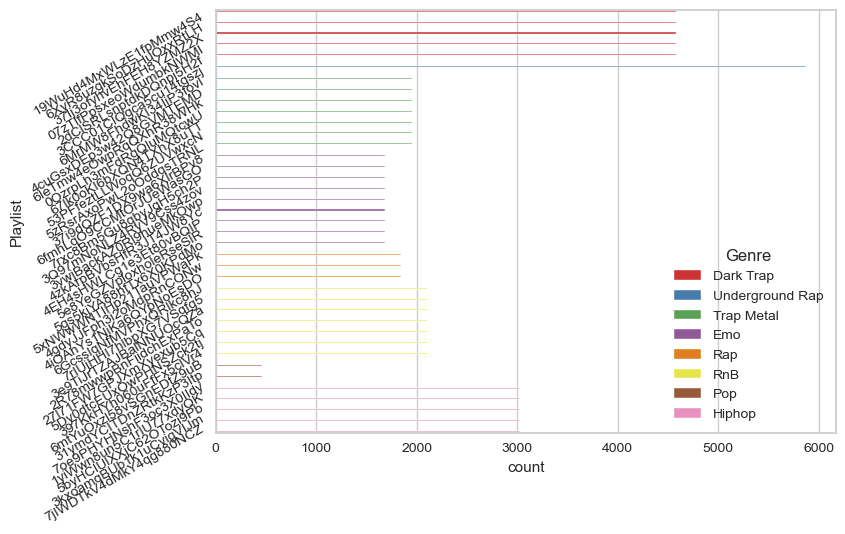

In [108]:
# Which genre has been streamed most on the playlist?
chart = sns.countplot(y='Playlist',data=genre,hue='Genre',palette='Set1')
chart.set_yticklabels(chart.get_yticklabels(),rotation='30',horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Genre'>

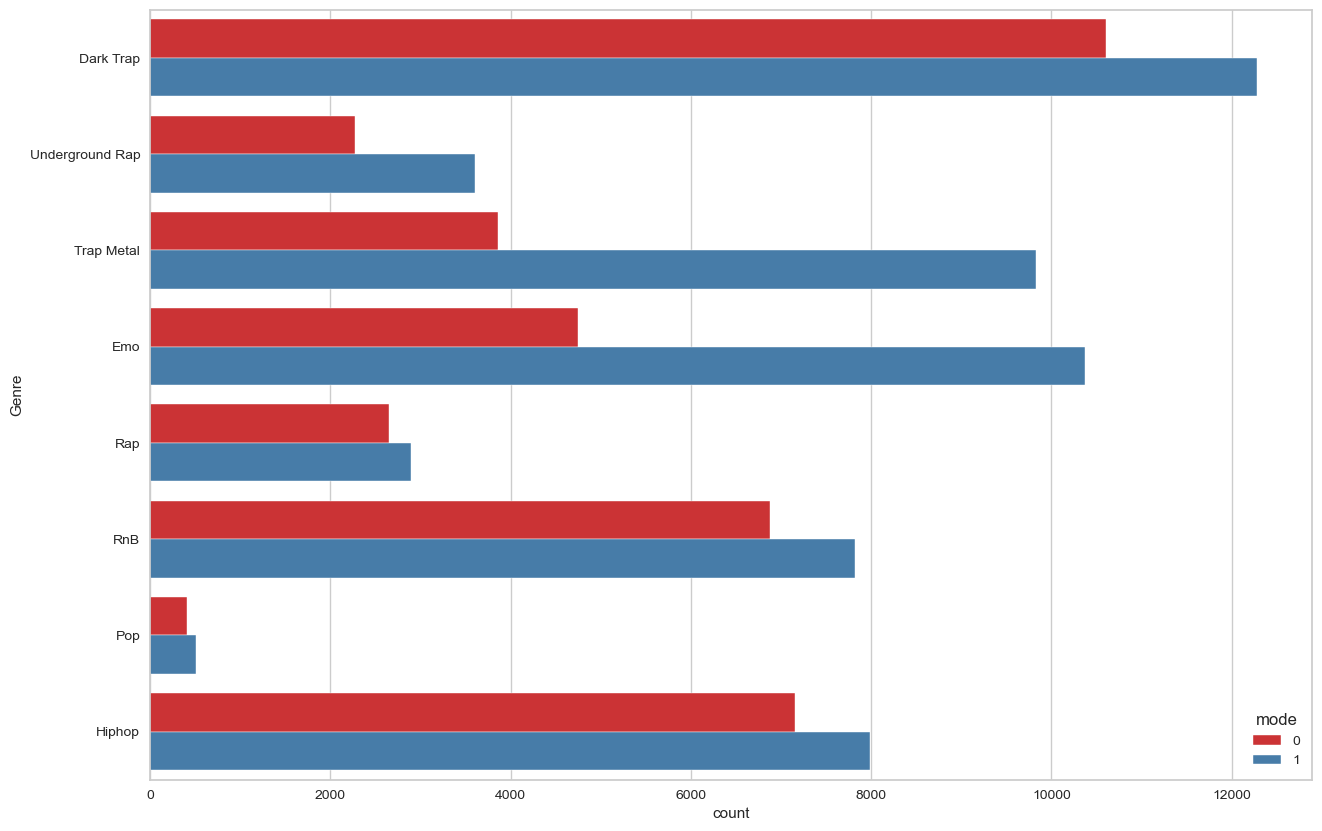

In [89]:
# What mode do most genres classify?
plt.figure(figsize=(15,10))
sns.set_palette('Set1')
sns.countplot(y='Genre',hue='mode',data=genre)

<AxesSubplot:xlabel='count', ylabel='Genre'>

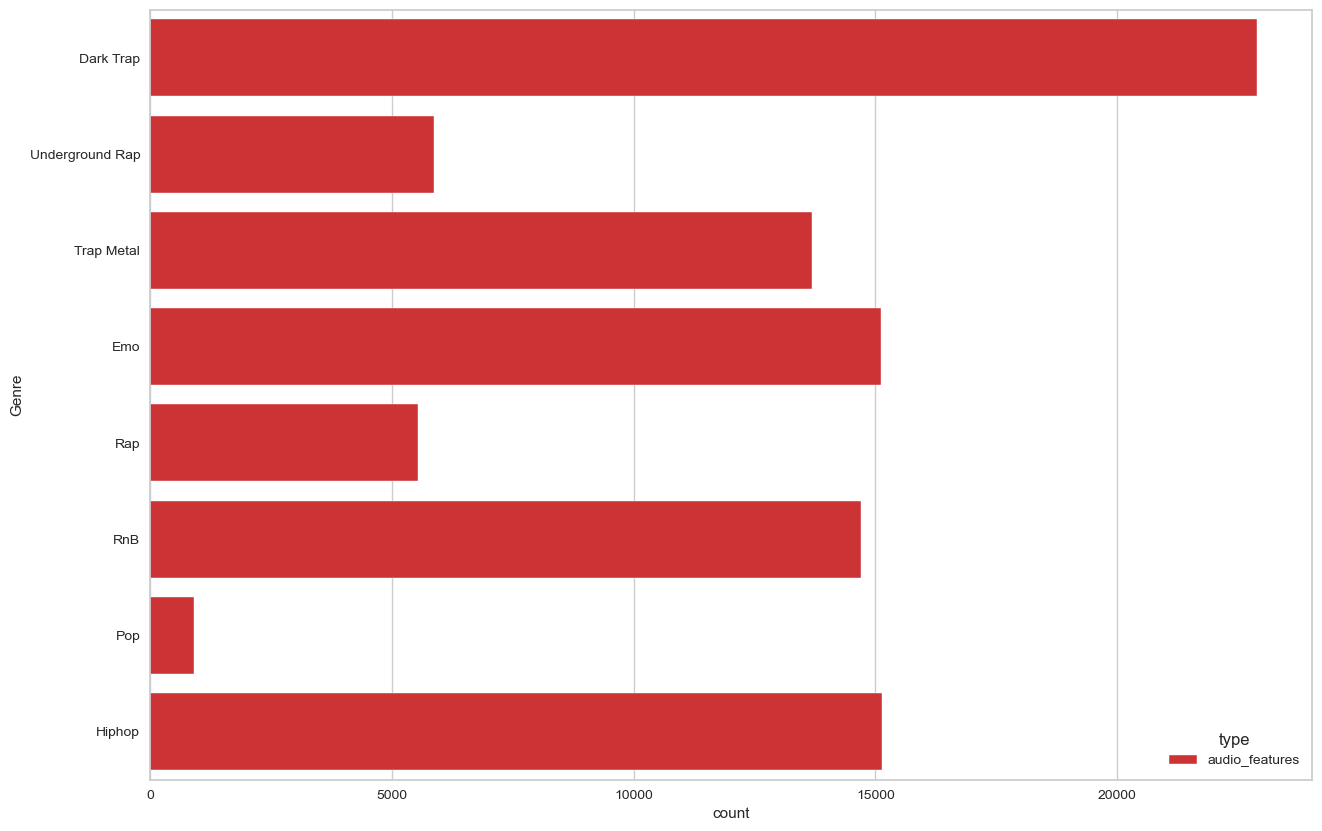

In [109]:
#What audio features does the genre classify?
#All of them are audio, so drop this column.
#The column does not inform us of anything.
plt.figure(figsize=(15,10))
sns.set_palette('Set1')
sns.countplot(y='Genre',hue='type',data=genre)

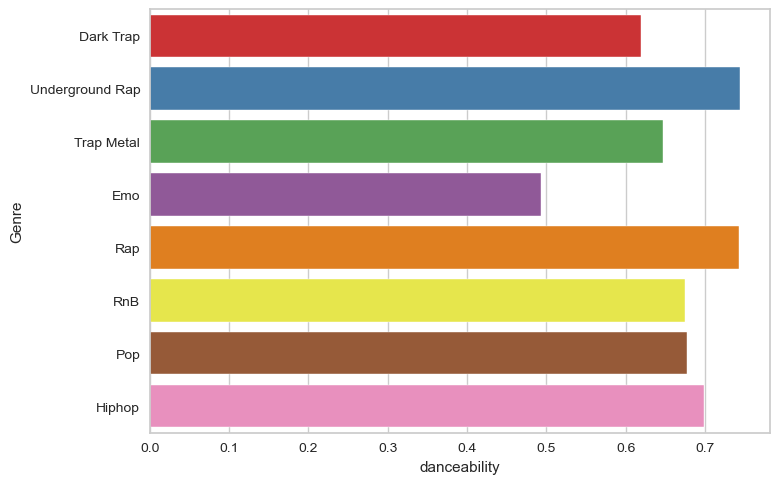

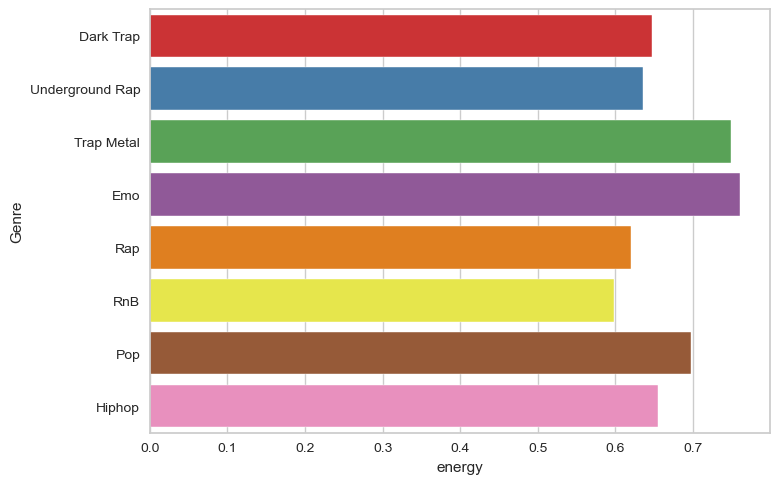

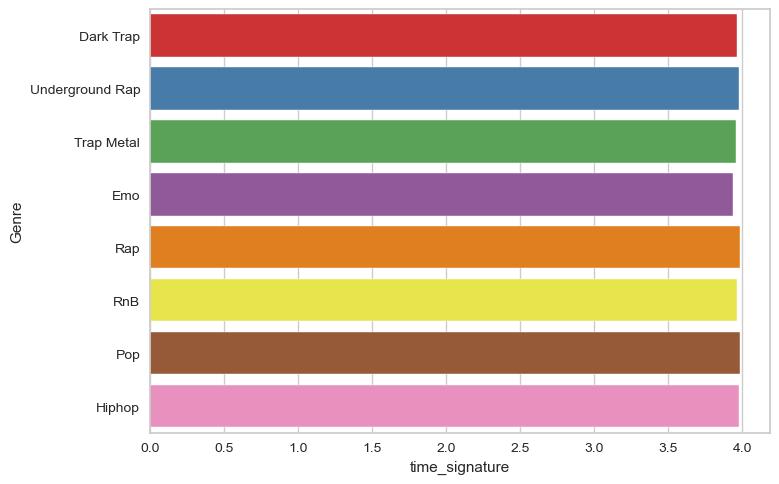

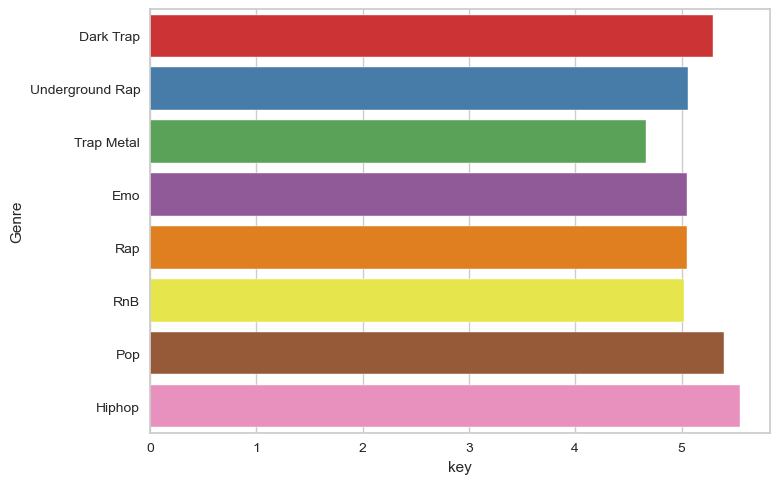

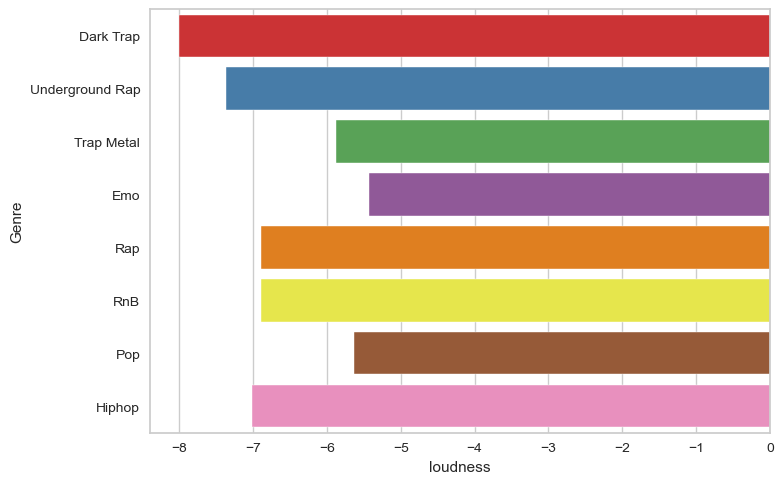

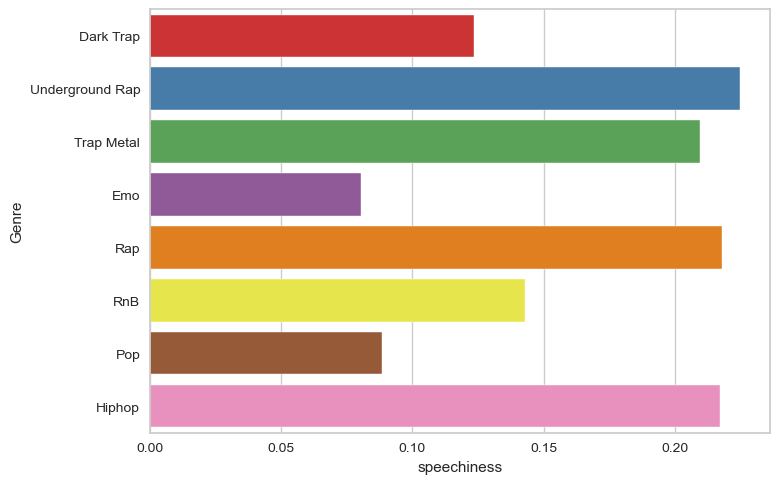

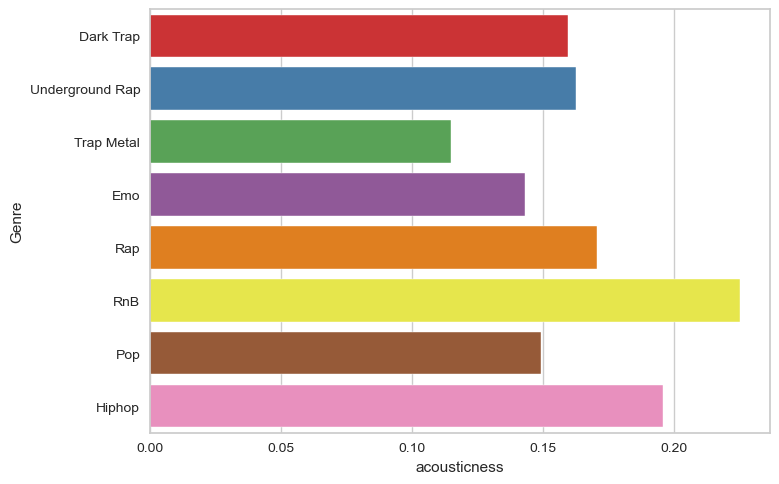

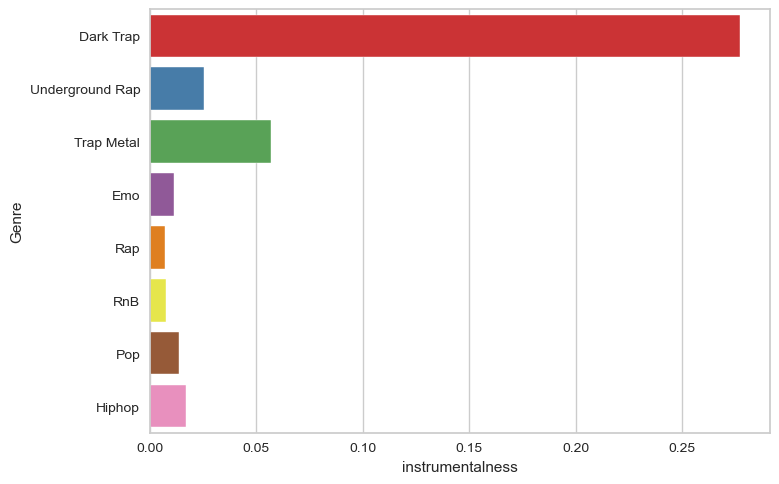

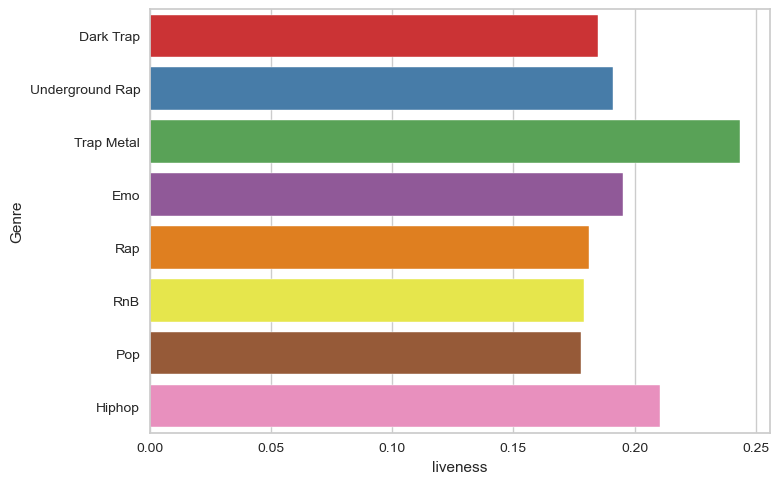

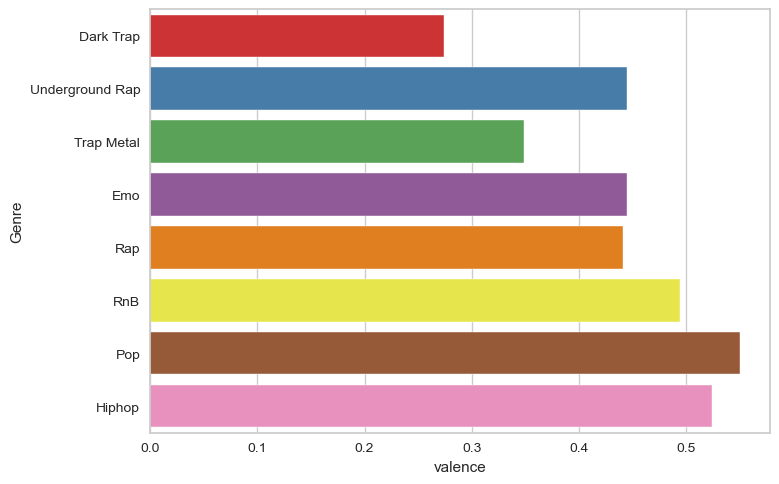

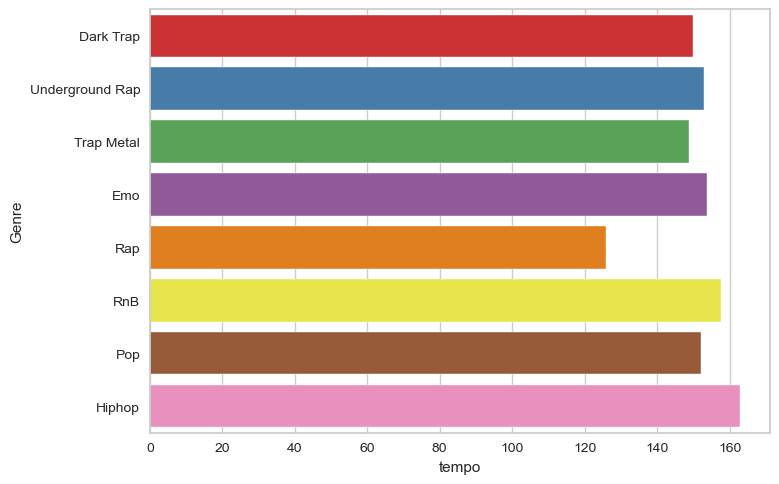

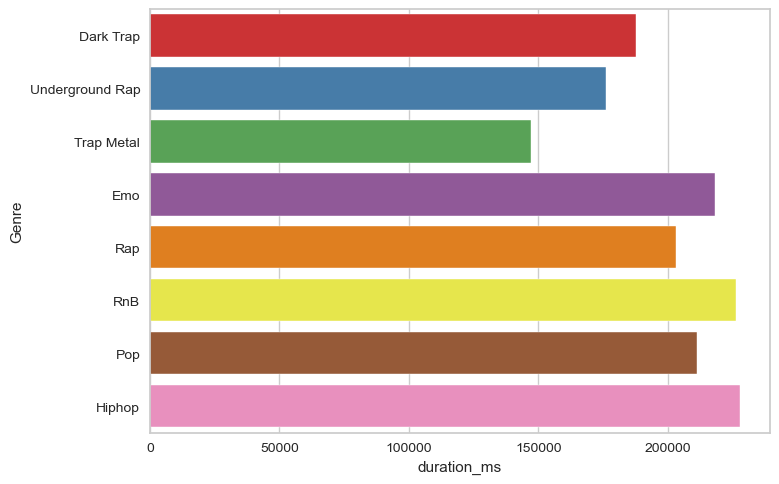

In [111]:
#Let's look at the relationship between numerical variables(features) and Genre
for i, cols in enumerate(numerical_variables):
        plt.figure(i)
        sns.set_palette('Set2')
        sns.barplot(x=genre[cols],y=genre['Genre'],palette='Set1',ci=None)

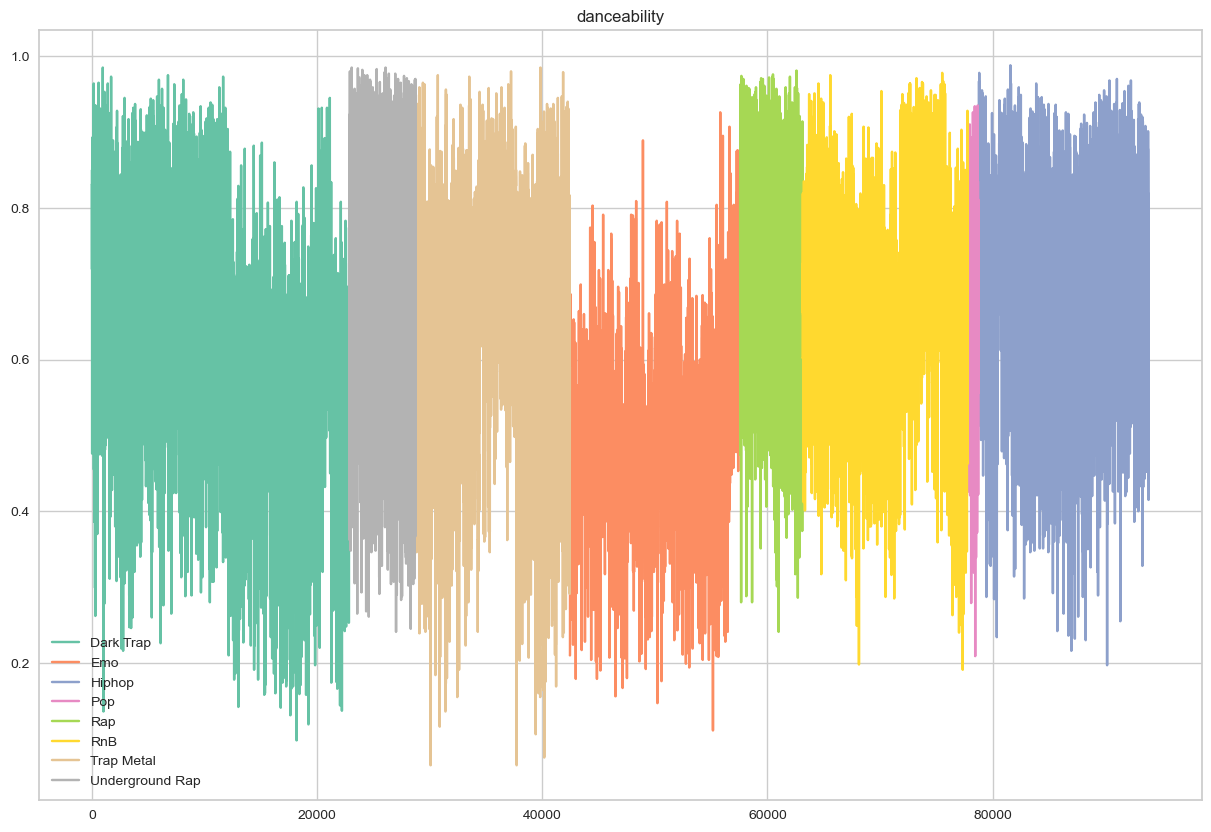

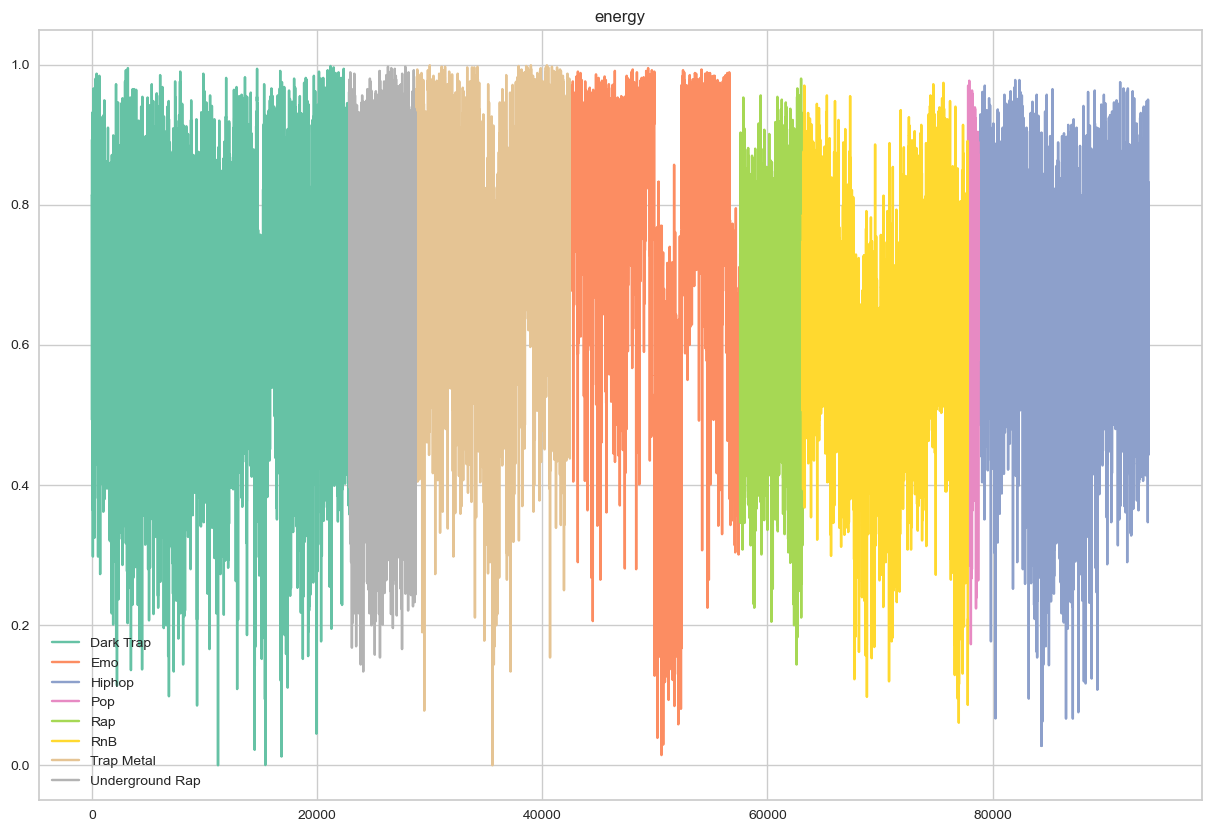

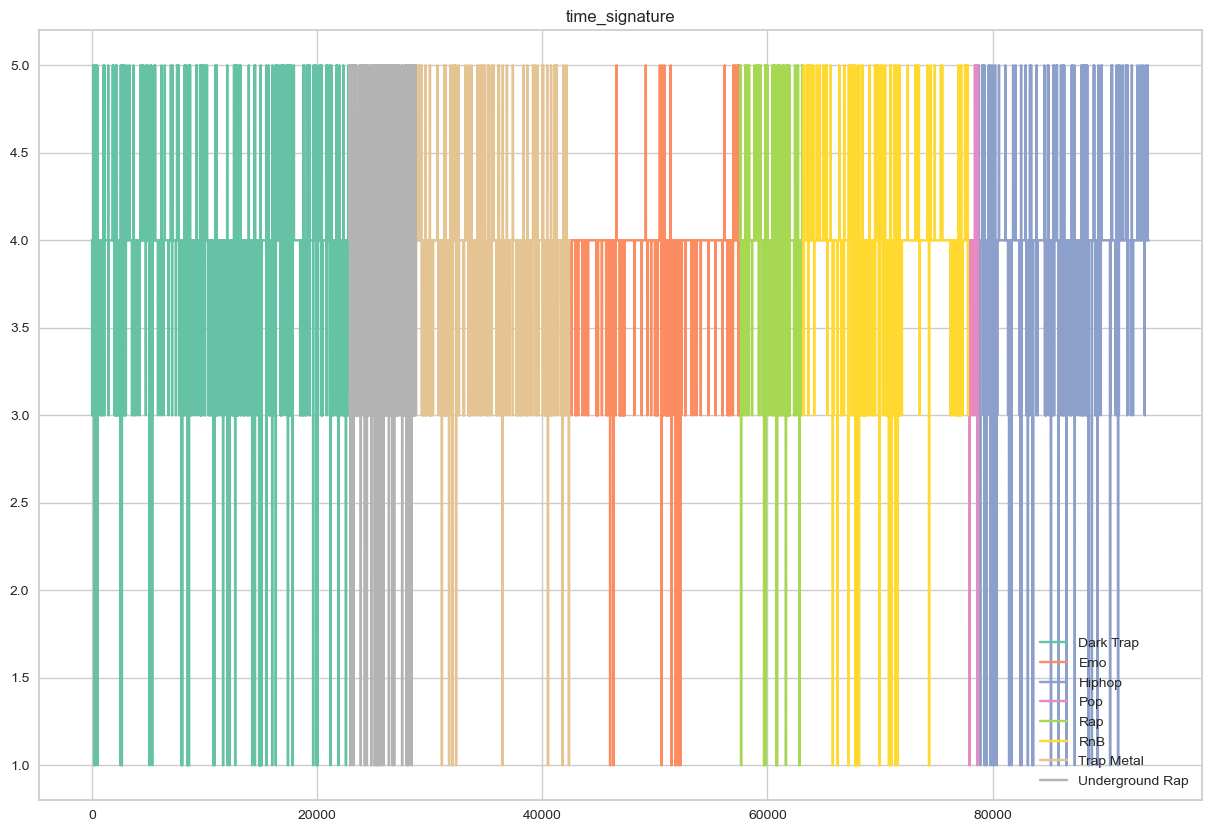

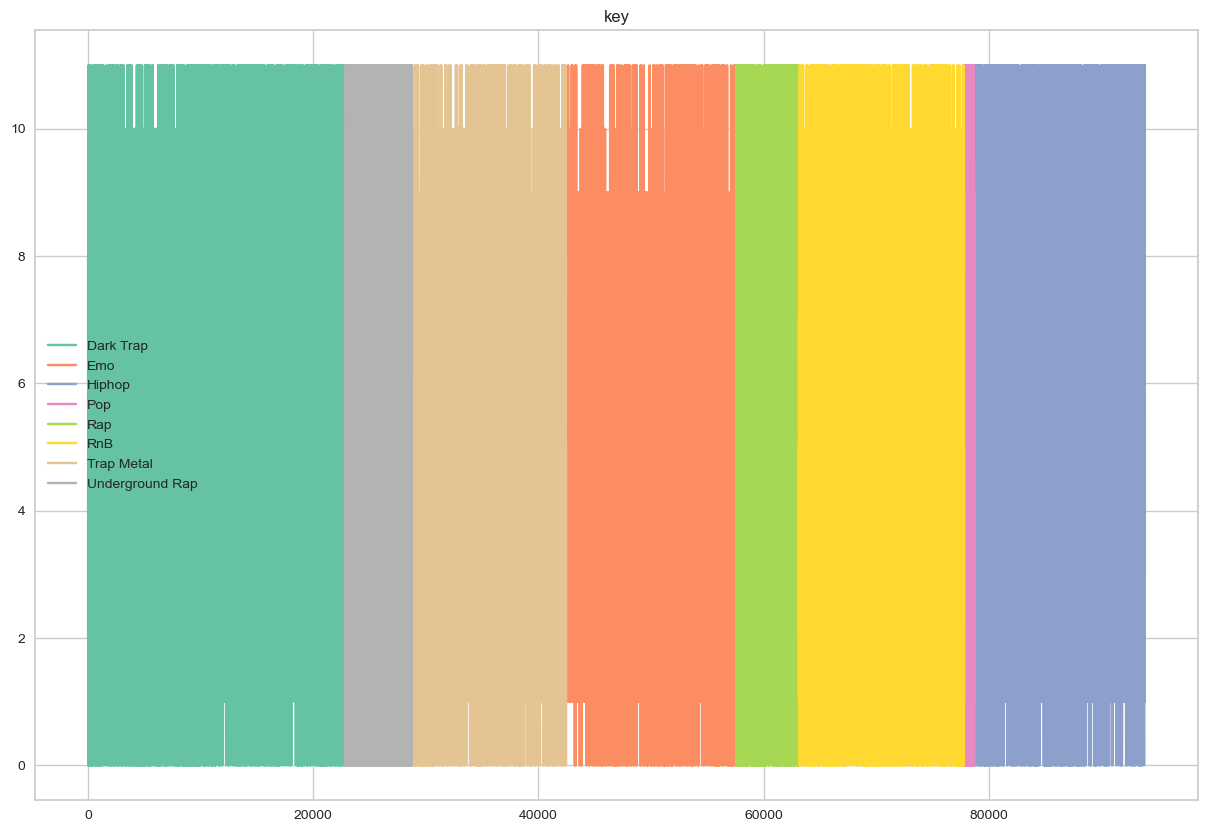

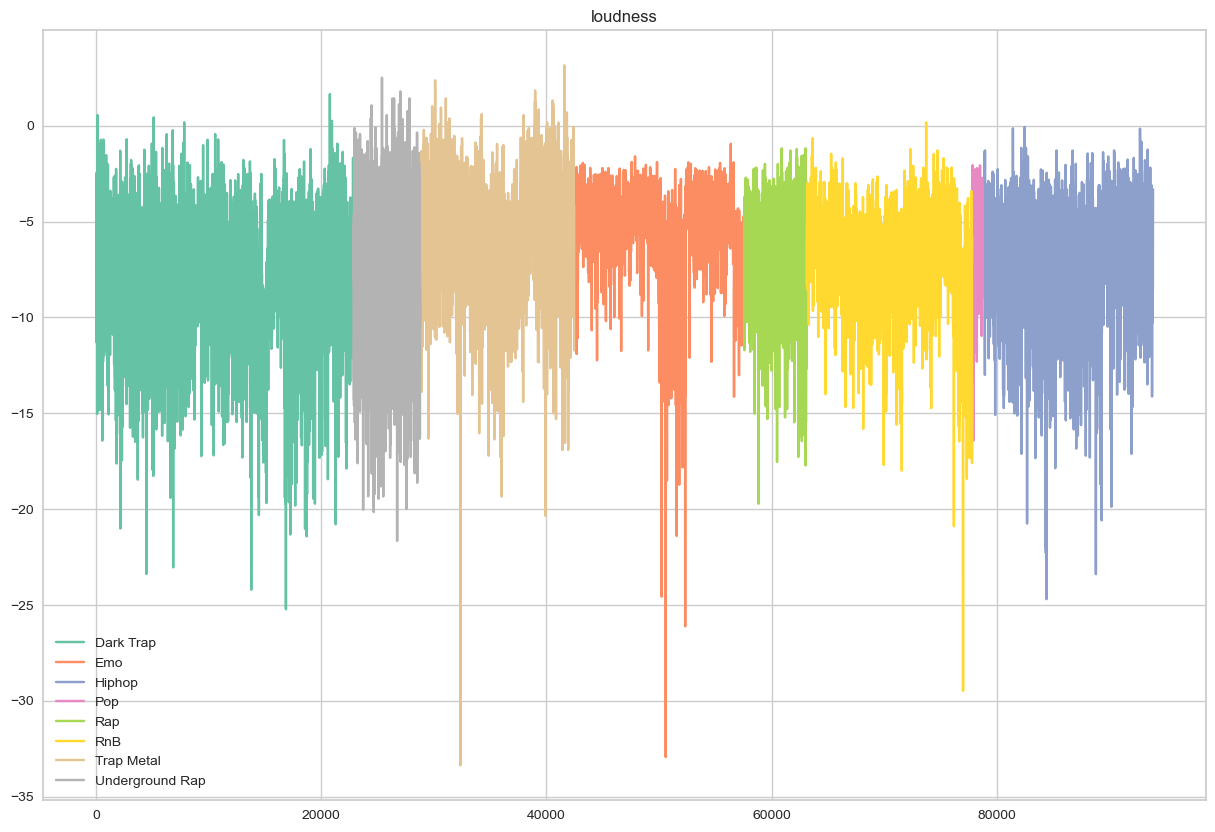

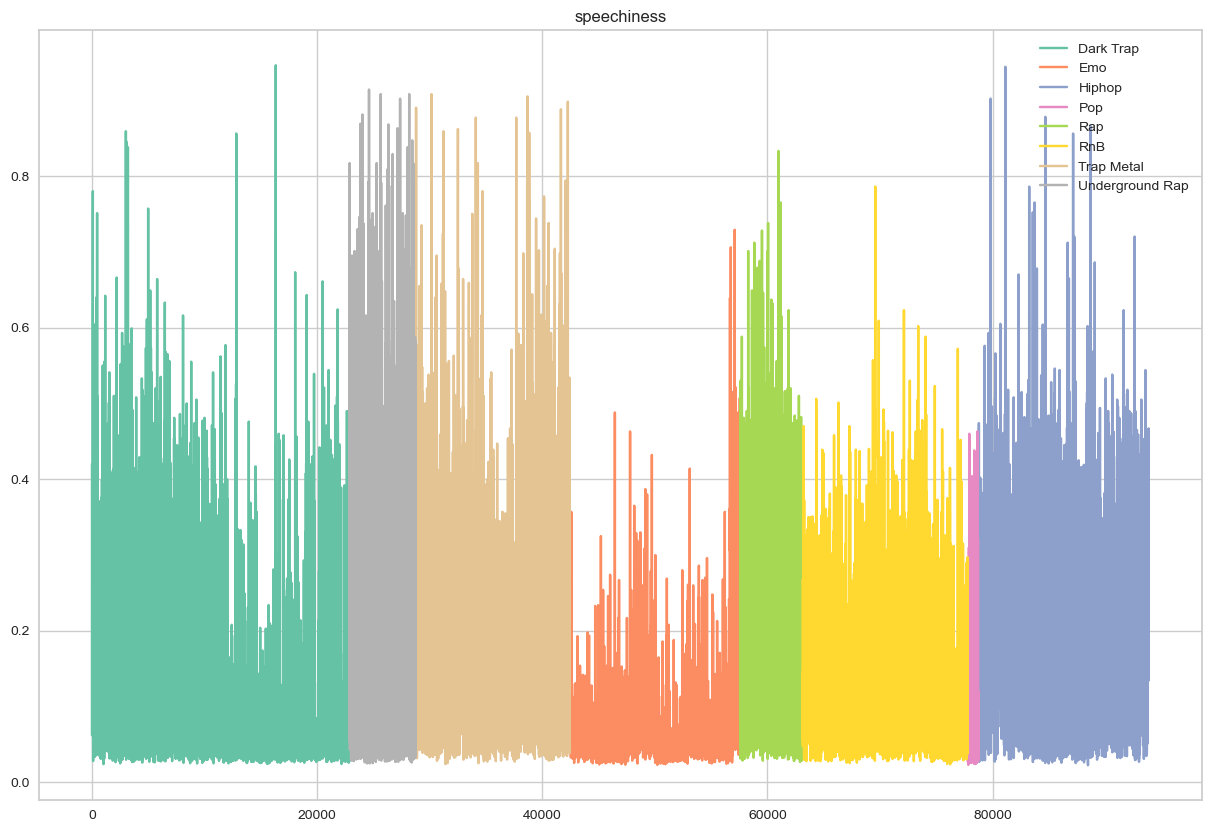

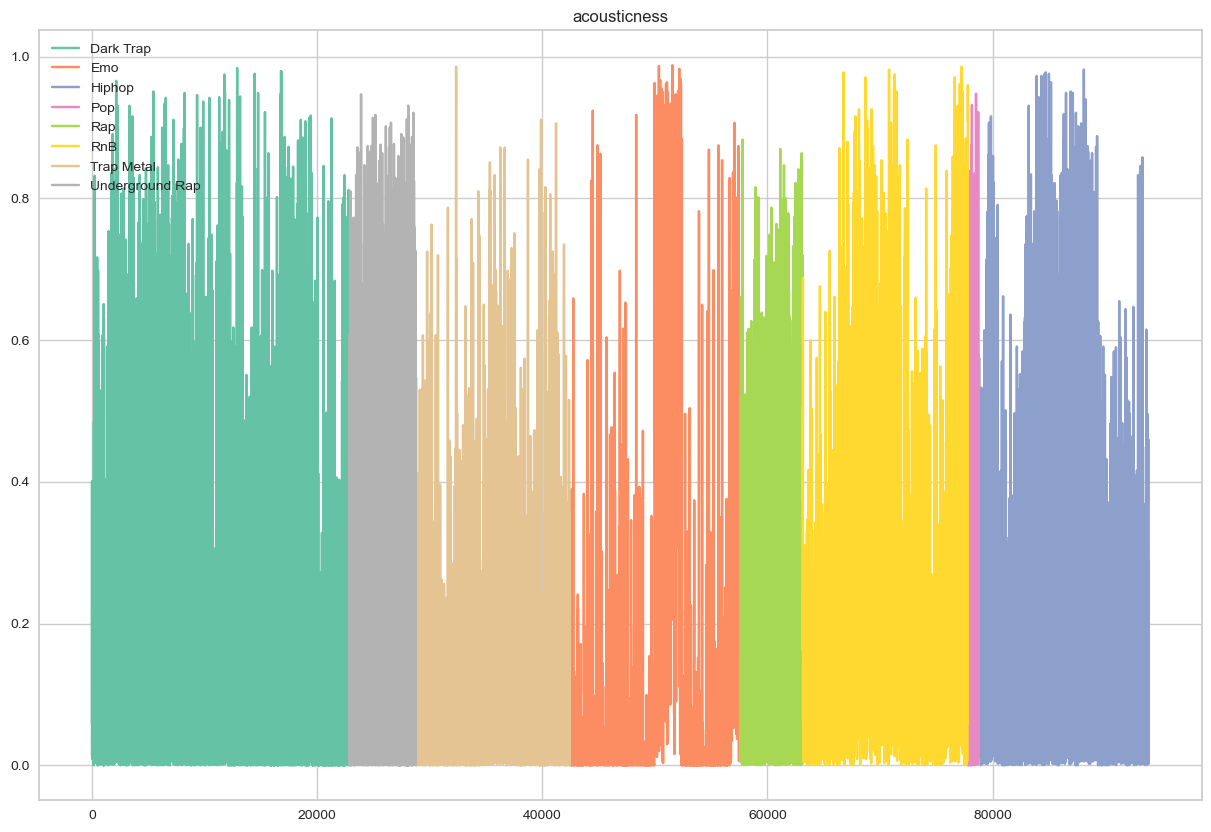

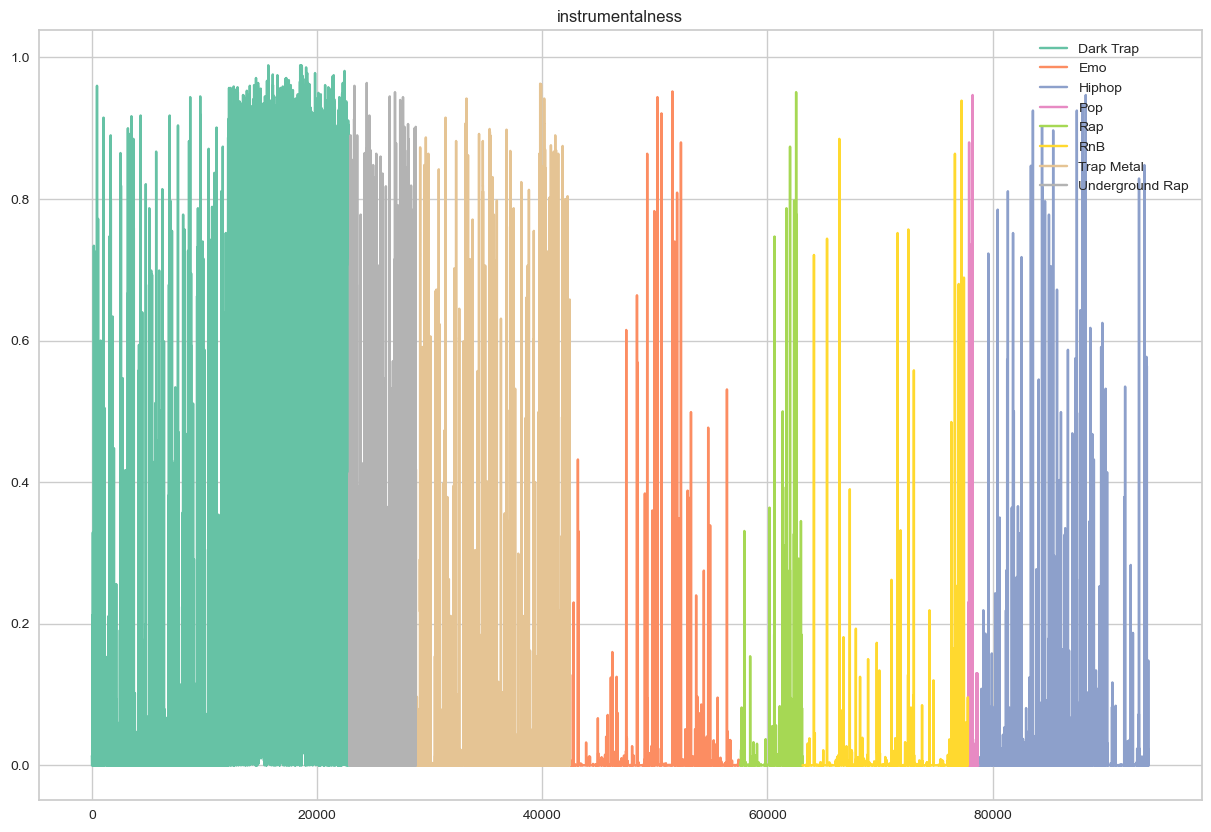

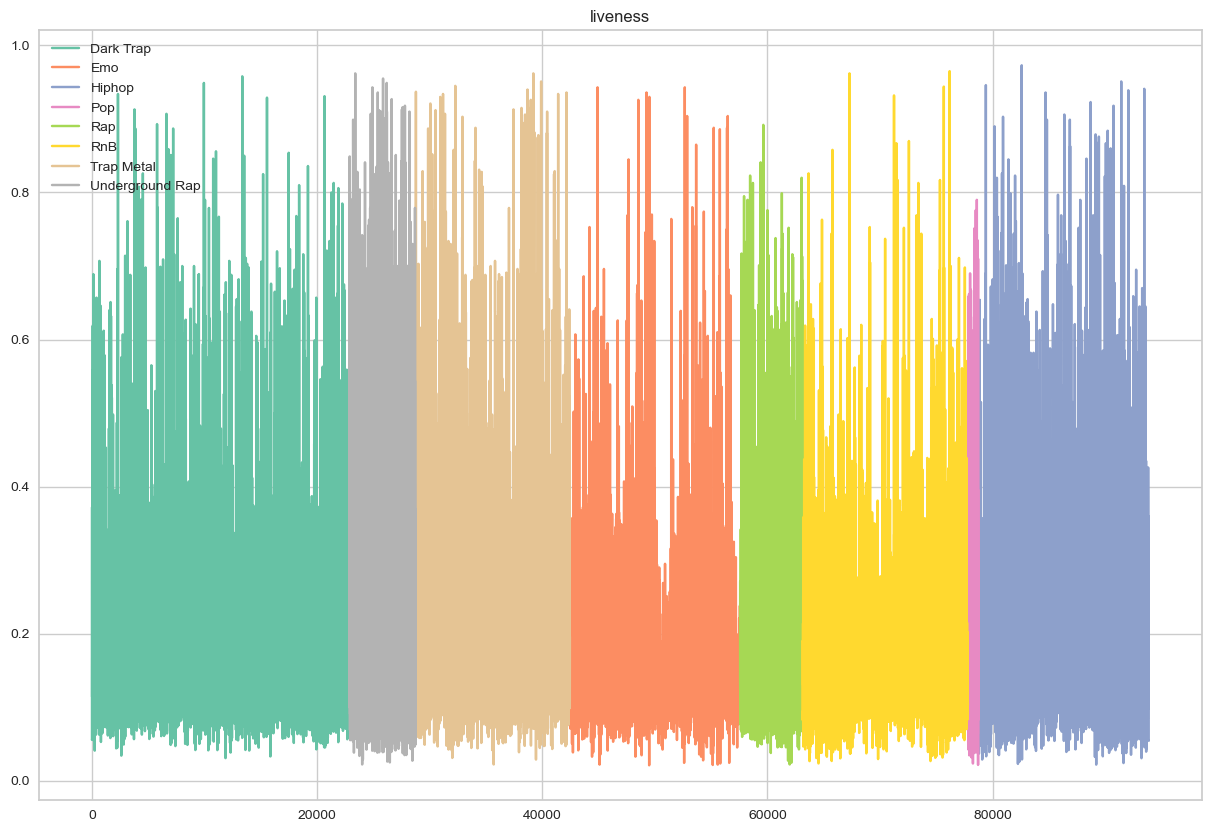

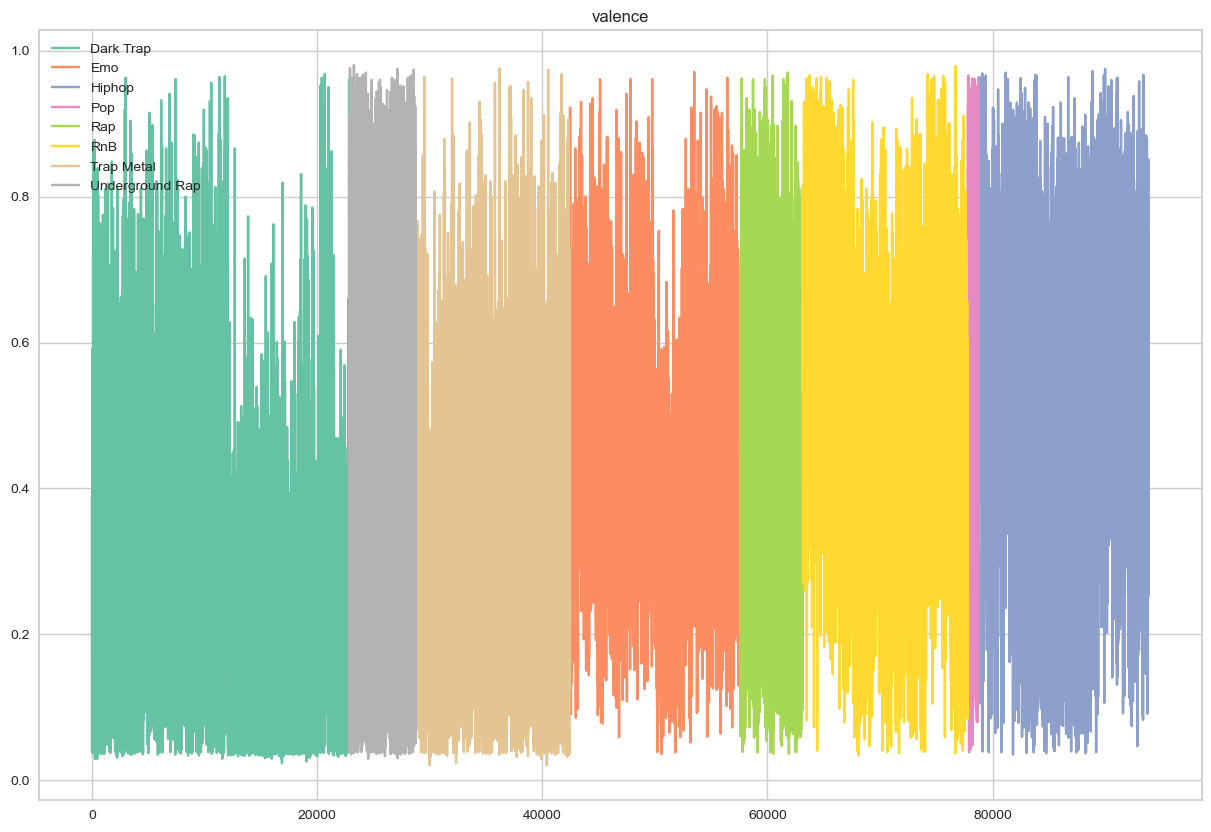

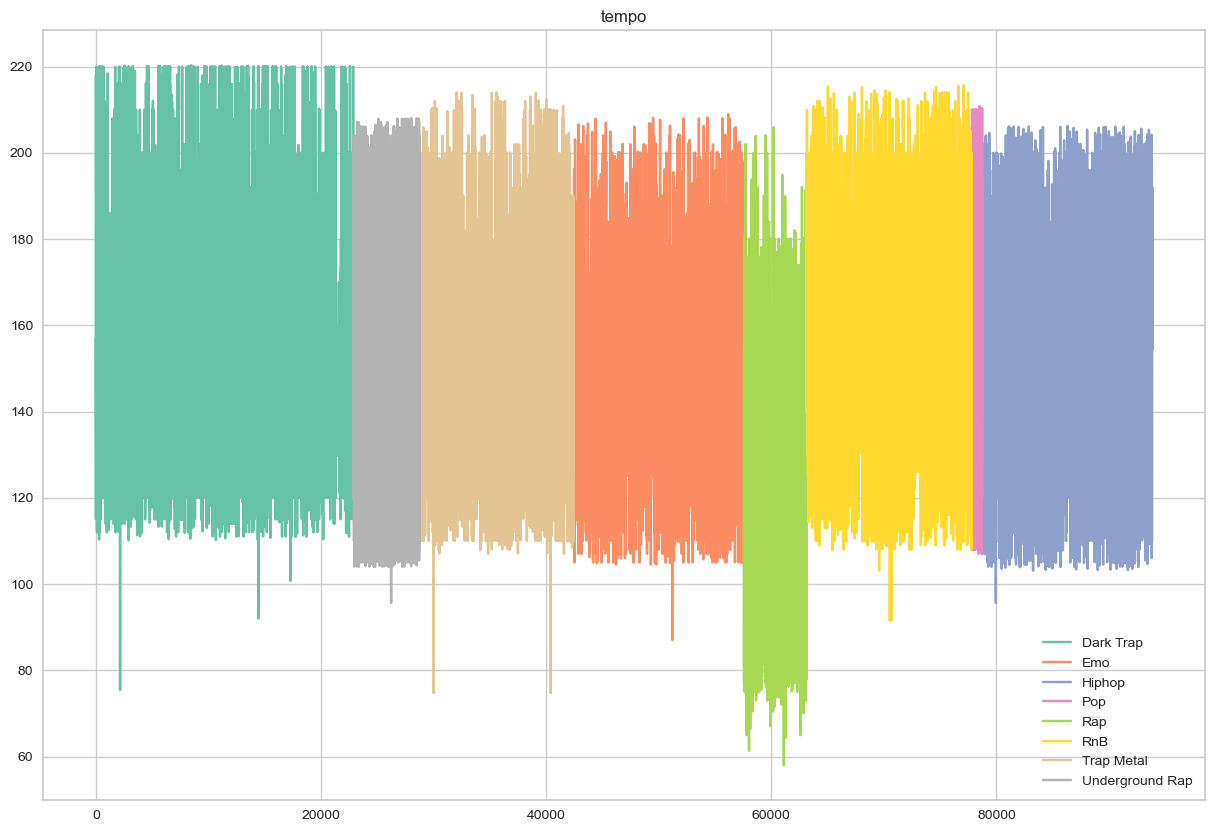

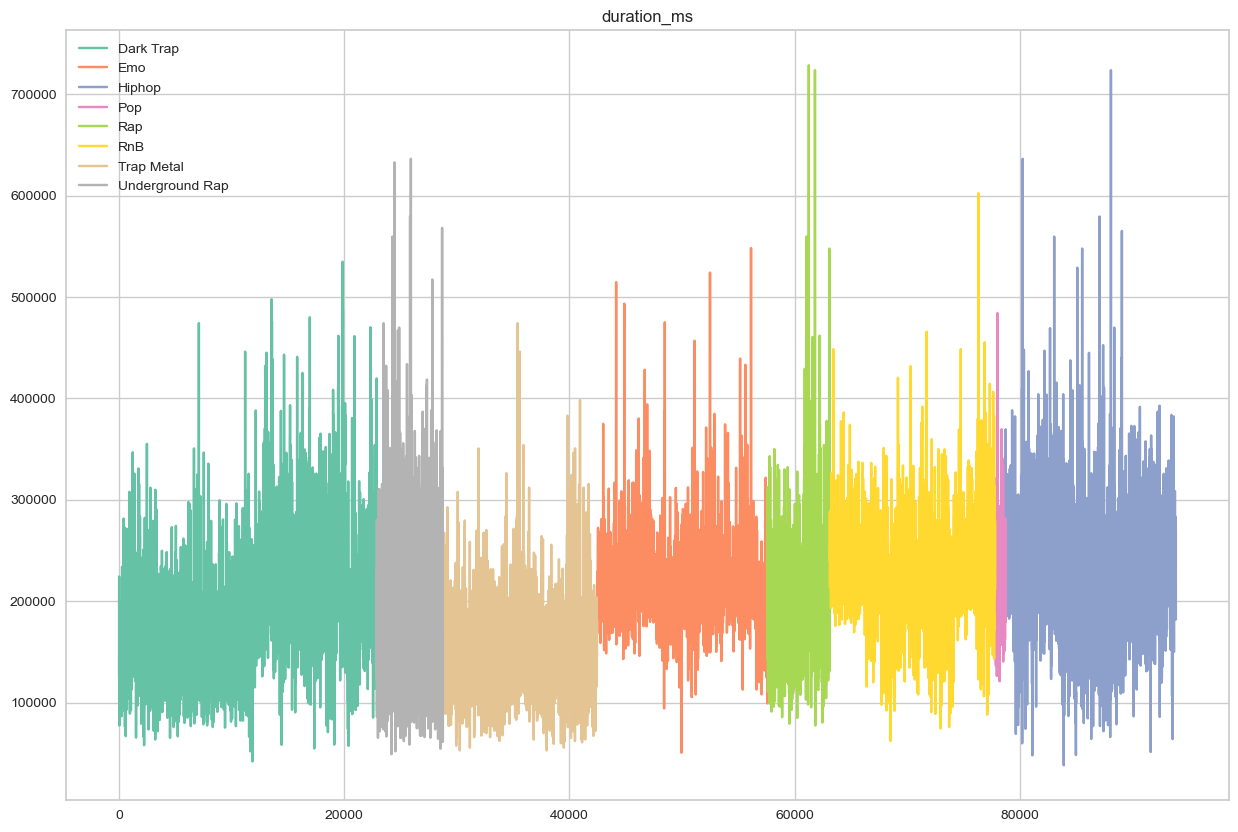

In [112]:
# Exploring trends of Genre by features 
genre_data = genre[['danceability', 'energy','time_signature','key','loudness','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','Genre']]
grouped_data = genre_data.groupby('Genre')


for col in numerical_variables.columns:
    fig, ax = plt.subplots()
    for i, d in grouped_data:
        d[col].plot(ax=ax, label=i, figsize=(15,10),kind='line')
        ax.set_title(col)
        
    ax.legend()
    plt.show()

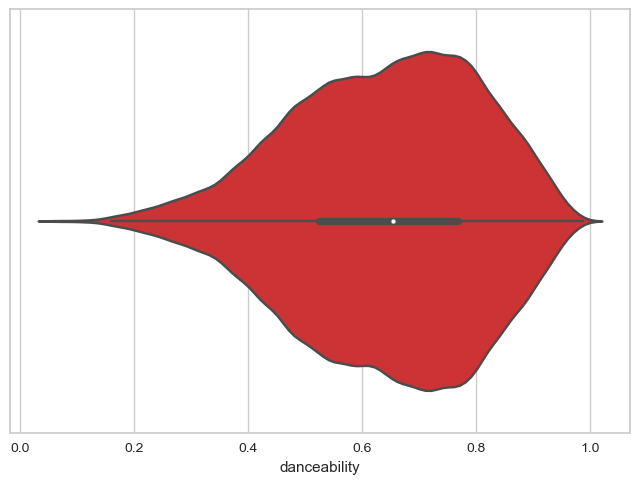

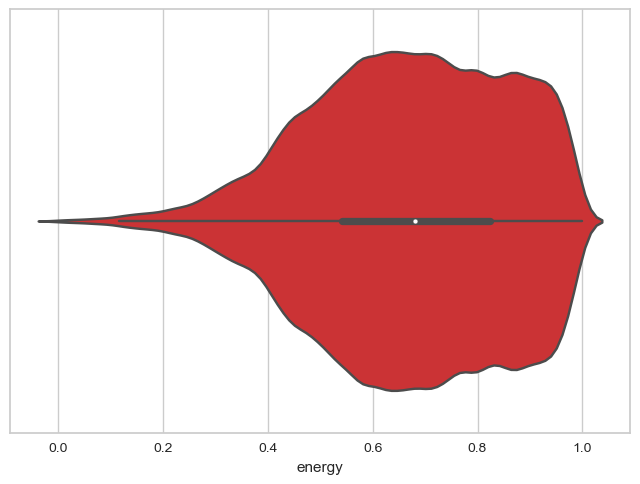

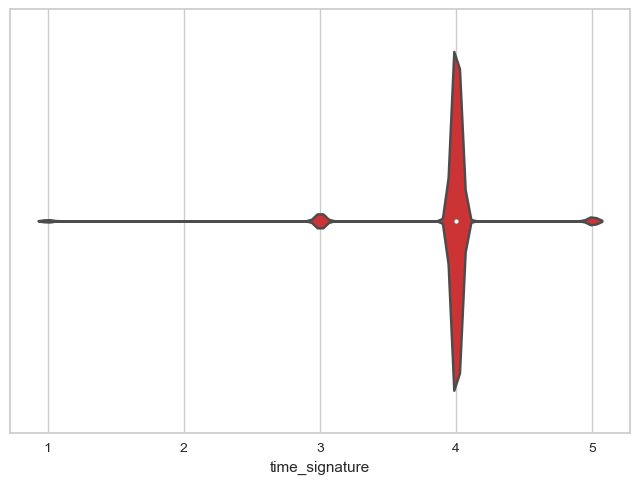

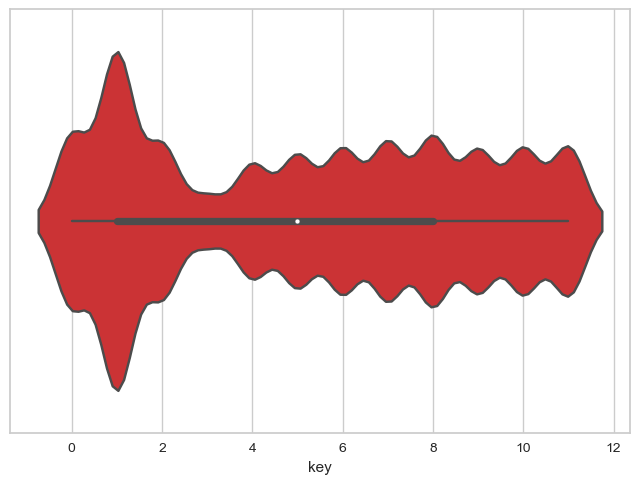

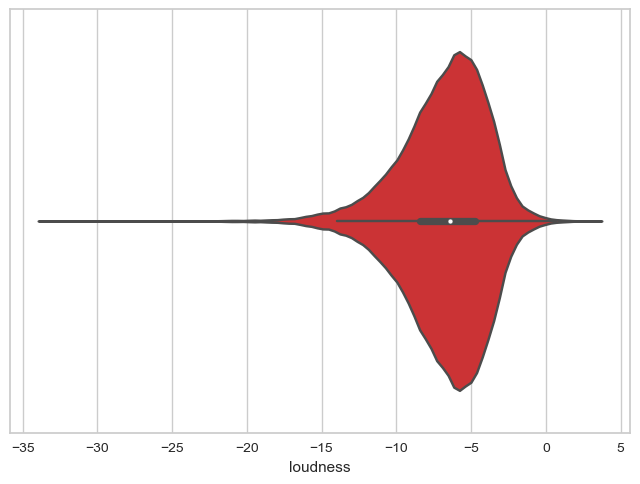

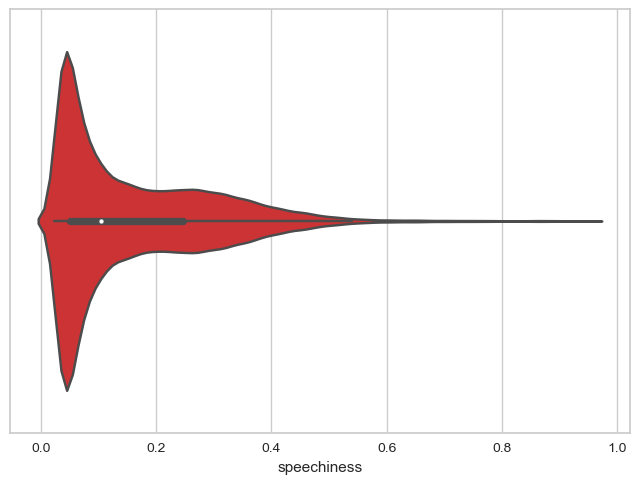

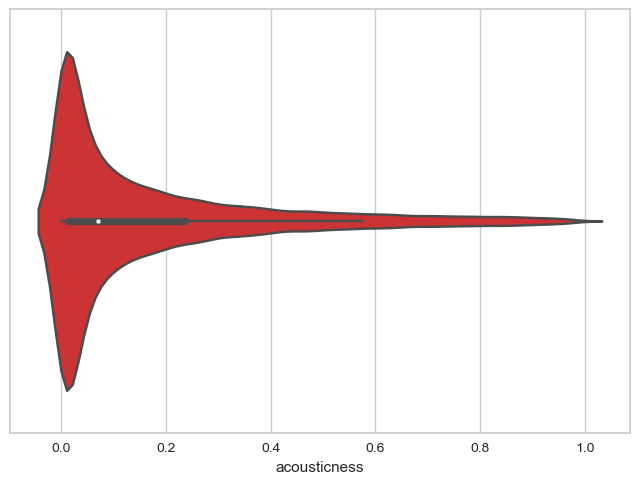

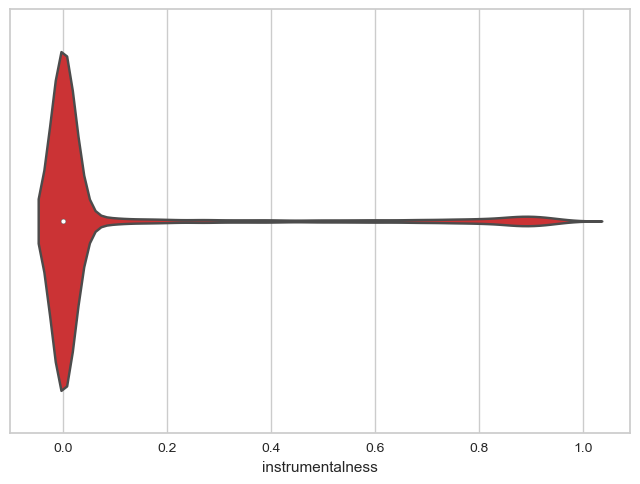

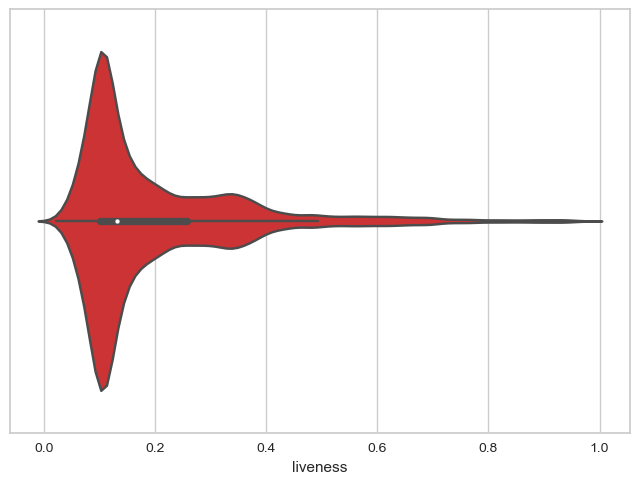

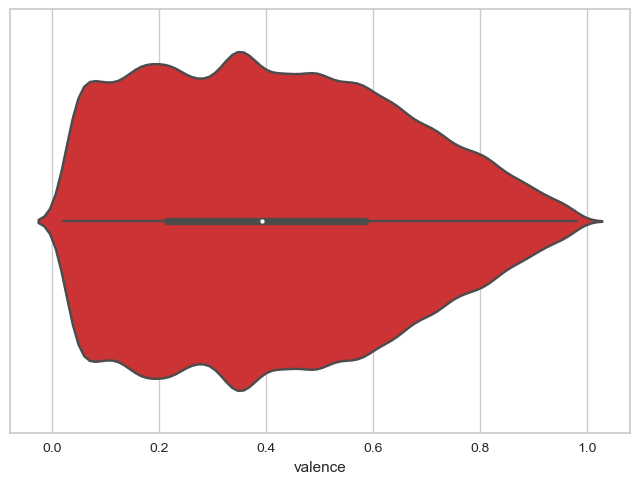

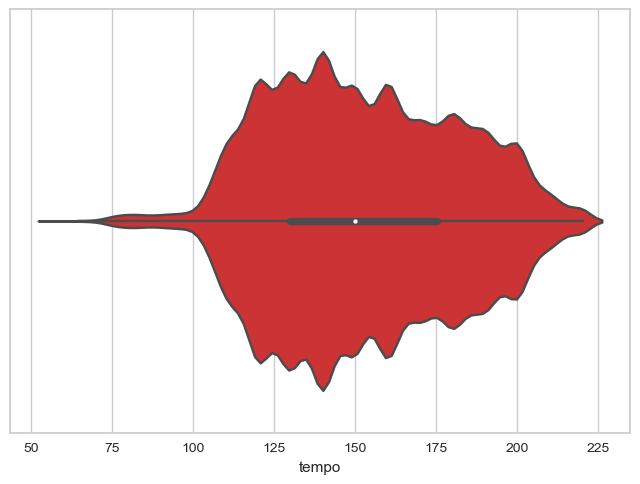

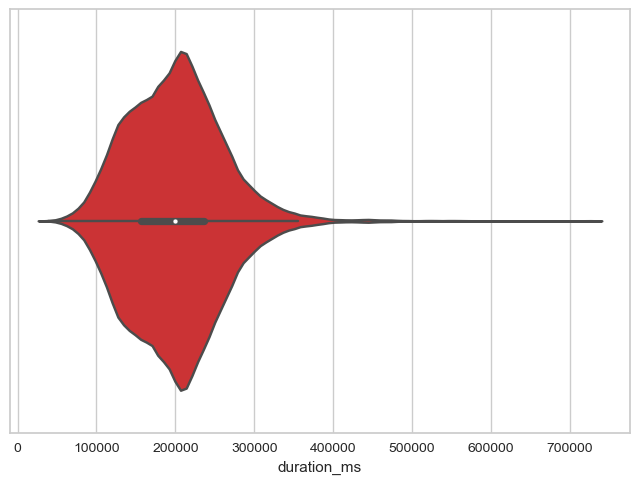

In [113]:
# Looking at 5 Number Summary and KDN by Group
for i, cols in enumerate(numerical_variables.columns):
    plt.figure(i)
    sns.violinplot(x=cols,data=genre,palette='Set1')

In [114]:
#Plot1 graphs corresponds to this code.
# What is the relationship between the danceability of a song and its features?
audio_features1 = ['energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for cols in audio_features1 :
    fig = px.scatter(genre, x =cols, y = 'danceability' , color = 'Genre', log_x=False,size_max=35)
    fig.write_html(f'./plot1_{cols}.html')


In [115]:
#Plot2 graphs corresponds to this code.
# What is the relationship between energy and other features?
audio_features2 = ['danceability', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for cols in audio_features2:
    fig = px.scatter(genre, x =cols, y = 'energy' , color = 'Genre', log_x=False,size_max=35)
    fig.write_html(f'./plot2_{cols}.html')


In [116]:
#Plot3 graphs corresponds to this code.
# What is the relationship between the duration of a song and audio features?
audio_features3 = ['danceability','energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for cols in audio_features3:
    fig = px.scatter(genre, x =cols, y = 'time_signature' , color = 'Genre', log_x=False,size_max=35)
    fig.write_html(f'./plot3_{cols}.html')

<AxesSubplot:>

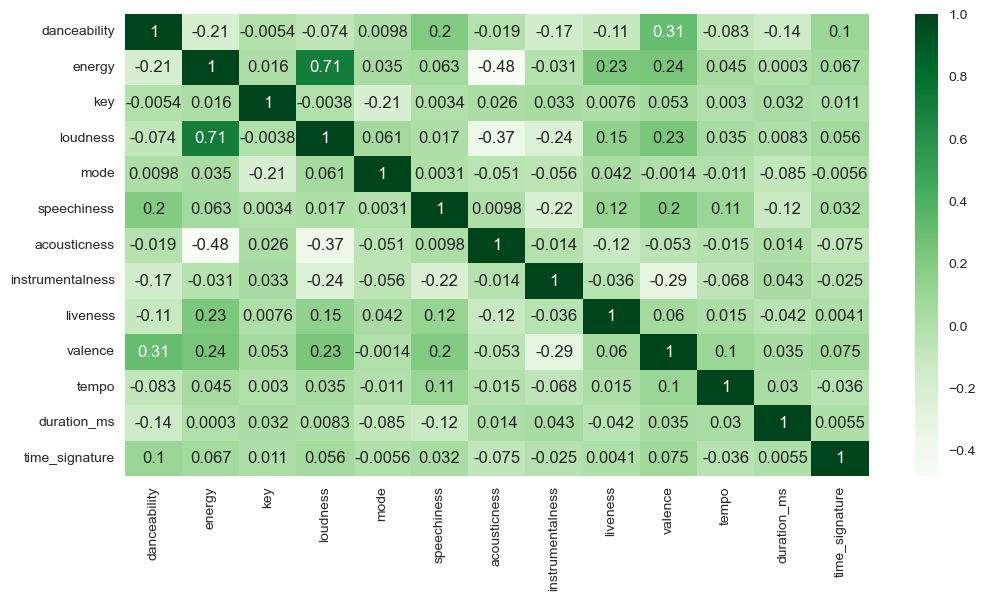

In [117]:
# Overall correlation plot
plt.figure(figsize=(12,6))
sns.heatmap(genre.corr(),annot=True,cmap='Greens')

In [118]:
# Keeping a genre copy for later
genre_1 = genre.copy()
genre_1.drop(columns=['id','type','Playlist',],axis=1,inplace=True)

In [120]:
genre_1.head(5)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1         0.42        0.0598   
1         0.831   0.814    2    -7.364     1         0.42        0.0598   
2         0.831   0.814    2    -7.364     1         0.42        0.0598   
3         0.831   0.814    2    -7.364     1         0.42        0.0598   
4         0.831   0.814    2    -7.364     1         0.42        0.0598   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0            0.0134    0.0556    0.389  156.985       124539               4   
1            0.0134    0.0556    0.389  156.985       124539               4   
2            0.0134    0.0556    0.389  156.985       124539               4   
3            0.0134    0.0556    0.389  156.985       124539               4   
4            0.0134    0.0556    0.389  156.985       124539               4   

       Genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark Trap  
4  Dark Trap

In [121]:
# Convert categorical to numerical
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
genre_1 ['Genre'] = l_encoder.fit_transform(genre_1['Genre'])

In [122]:
genre_1.head(3)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1         0.42        0.0598   
1         0.831   0.814    2    -7.364     1         0.42        0.0598   
2         0.831   0.814    2    -7.364     1         0.42        0.0598   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0            0.0134    0.0556    0.389  156.985       124539               4   
1            0.0134    0.0556    0.389  156.985       124539               4   
2            0.0134    0.0556    0.389  156.985       124539               4   

   Genre  
0      0  
1      0  
2      0

In [123]:
genre_1.tail(3)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
93873         0.816   0.775   11    -3.323     1        0.234          0.16   
93874         0.816   0.775   11    -3.323     1        0.234          0.16   
93875         0.816   0.775   11    -3.323     1        0.234          0.16   

       instrumentalness  liveness  valence    tempo  duration_ms  \
93873           0.00031    0.0543    0.527  186.862       270587   
93874           0.00031    0.0543    0.527  186.862       270587   
93875           0.00031    0.0543    0.527  186.862       270587   

       time_signature  Genre  
93873               4      2  
93874               4      2  
93875               4      2

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(genre_1.drop('Genre',axis=1))

StandardScaler()

In [46]:
scaled_features = scaler.transform(genre_1.drop('Genre',axis=1))

In [47]:
df_scaled = pd.DataFrame(scaled_features,columns=genre_1.columns[:-1])
df_scaled.head(5)

danceability   energy       key  loudness      mode  speechiness  \
0      1.157478  0.75811 -0.857105  -0.18441  0.835376     1.928869   
1      1.157478  0.75811 -0.857105  -0.18441  0.835376     1.928869   
2      1.157478  0.75811 -0.857105  -0.18441  0.835376     1.928869   
3      1.157478  0.75811 -0.857105  -0.18441  0.835376     1.928869   
4      1.157478  0.75811 -0.857105  -0.18441  0.835376     1.928869   

   acousticness  instrumentalness  liveness   valence    tempo  duration_ms  \
0     -0.490249         -0.303842  -0.92866 -0.090635  0.15622    -1.240821   
1     -0.490249         -0.303842  -0.92866 -0.090635  0.15622    -1.240821   
2     -0.490249         -0.303842  -0.92866 -0.090635  0.15622    -1.240821   
3     -0.490249         -0.303842  -0.92866 -0.090635  0.15622    -1.240821   
4     -0.490249         -0.303842  -0.92866 -0.090635  0.15622    -1.240821   

   time_signature  
0        0.113026  
1        0.113026  
2        0.113026  
3        0.113026  
4        0.113026

Text(0, 0.5, 'Inertia')

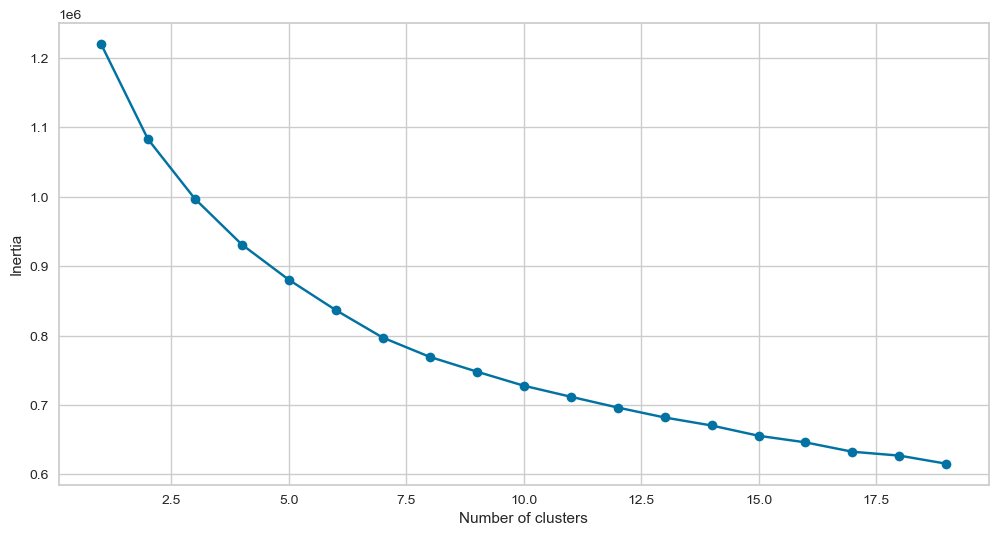

In [48]:
# Elbow method to find the optimal k
SSD = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(df_scaled)
    SSD.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
df_result = pd.DataFrame({'Cluster':range(1,20), 'SSD':SSD})
plt.figure(figsize=(12,6))
plt.plot(df_result['Cluster'], df_result['SSD'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

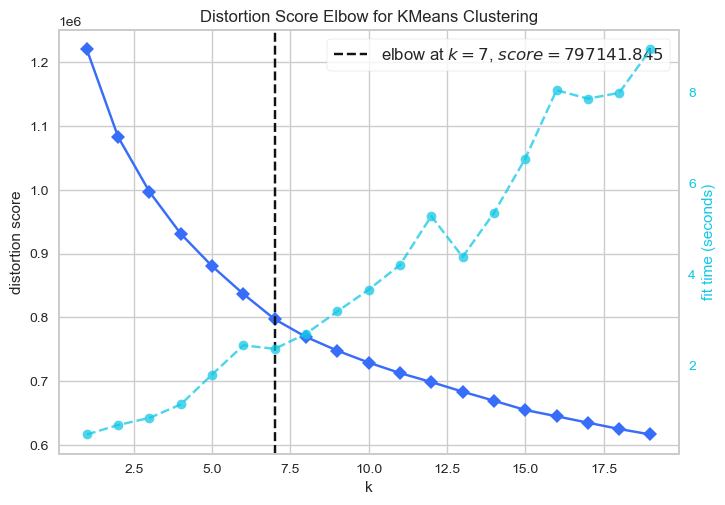

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [250]:
# K-Elbow visualization with distortion score
kmodel = KMeans(random_state=42)
elb_vis = KElbowVisualizer(kmodel,k=(1,20))
elb_vis.fit(df_scaled)
elb_vis.show()

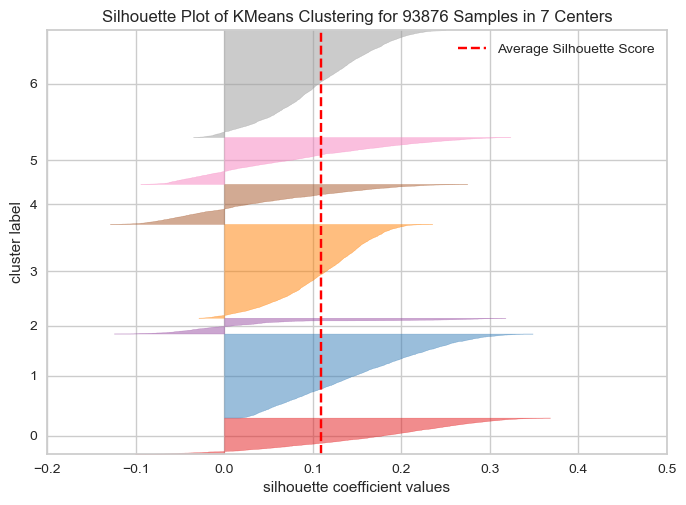

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93876 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# Average 7 clusters sil score
cluster_7 = KMeans(n_clusters =7, random_state=42)

sil_visualizer = SilhouetteVisualizer(cluster_7 )
sil_visualizer.fit(df_scaled)    
sil_visualizer.show()

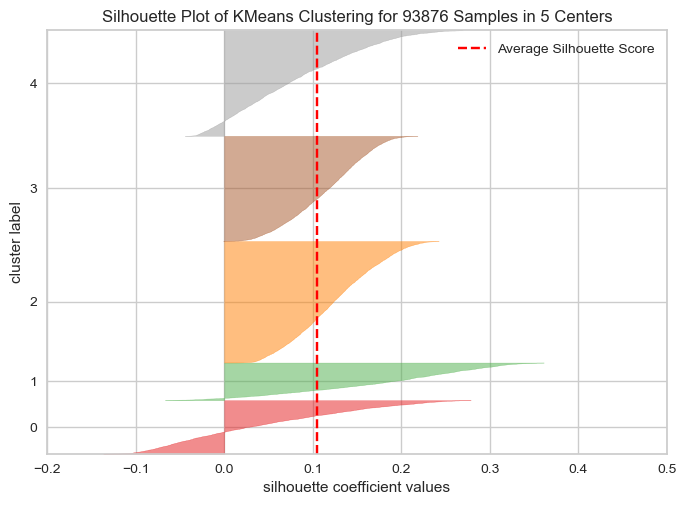

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93876 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [252]:
# Average 7 clusters sil score
cluster_5= KMeans(n_clusters =5, random_state=42)

score = SilhouetteVisualizer(cluster_5)
score.fit(df_scaled)    
score.show()

In [49]:
# Reconfirm it
from kneed import KneeLocator, DataGenerator as dg
i_knee = KneeLocator(range(1,20),SSD,S=0.1, curve='convex',direction='decreasing')

i_knee = i_knee.elbow
print("elbow at k =", f'{i_knee:.0f} clusters')

elbow at k = 7 clusters


In [50]:
# Silhoutte Score is higher at 7, so we are using 7.
# How many points belong to each group?
# We will use this classification to make an occurrence rating scale.
kmeans = KMeans(n_clusters=i_knee,init='k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)
genre_2= pd.DataFrame(genre)
genre_2['cluster']=pred
genre_2['cluster'].value_counts()

2    23775
4    20718
1    18578
6    10528
3     8706
5     8023
0     3548
Name: cluster, dtype: int64

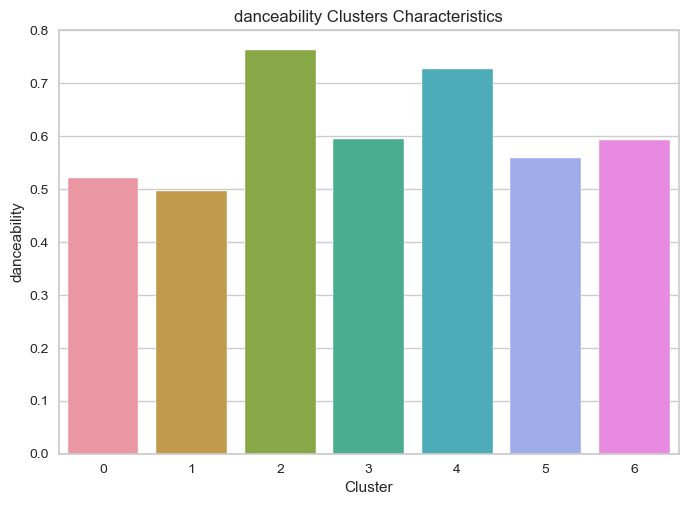

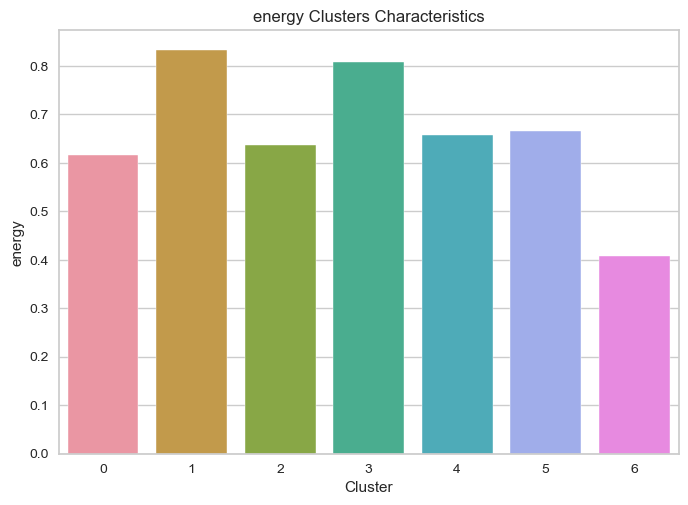

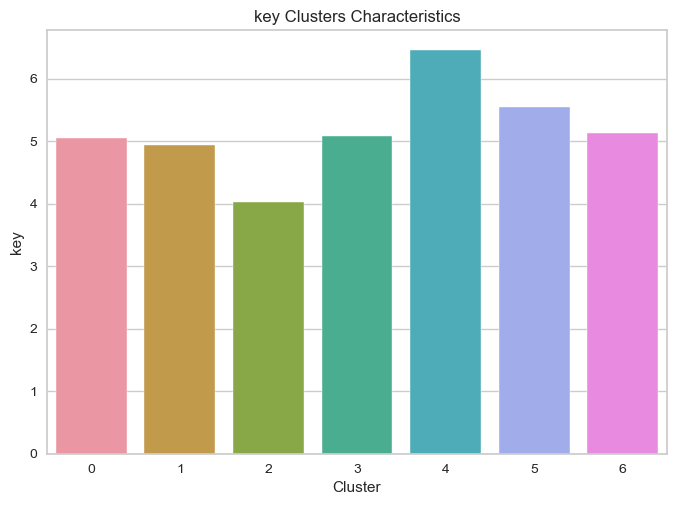

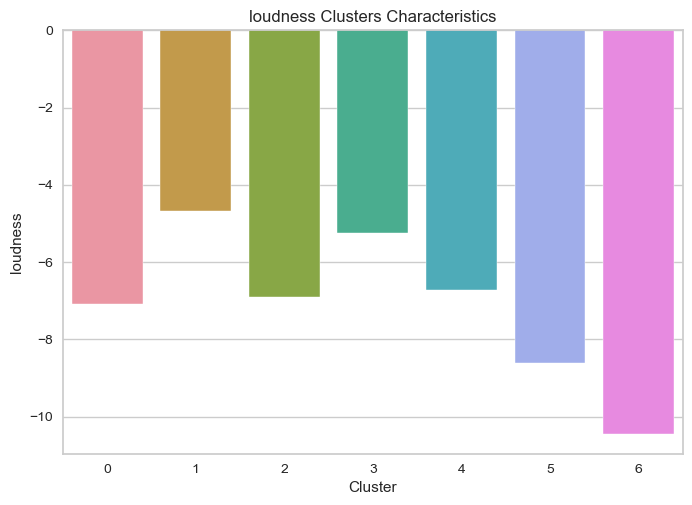

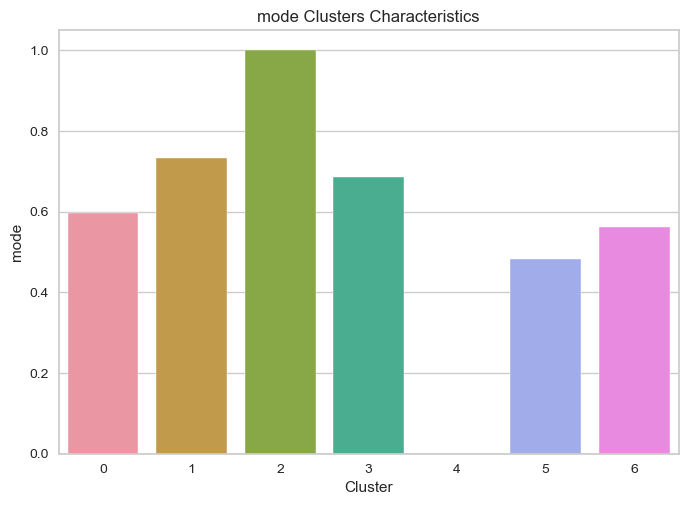

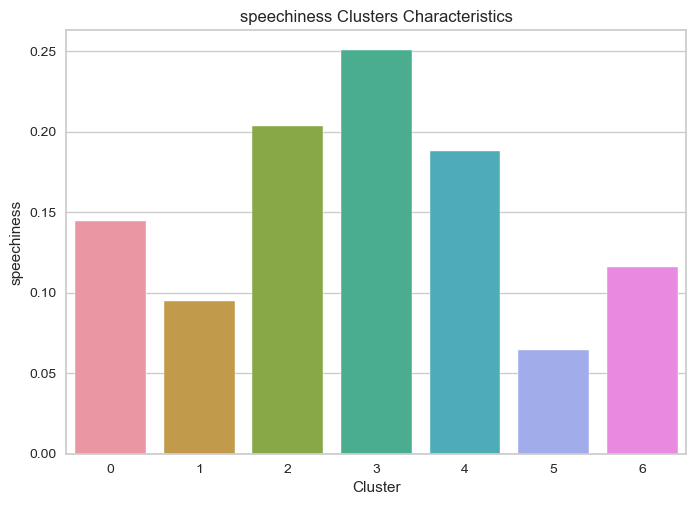

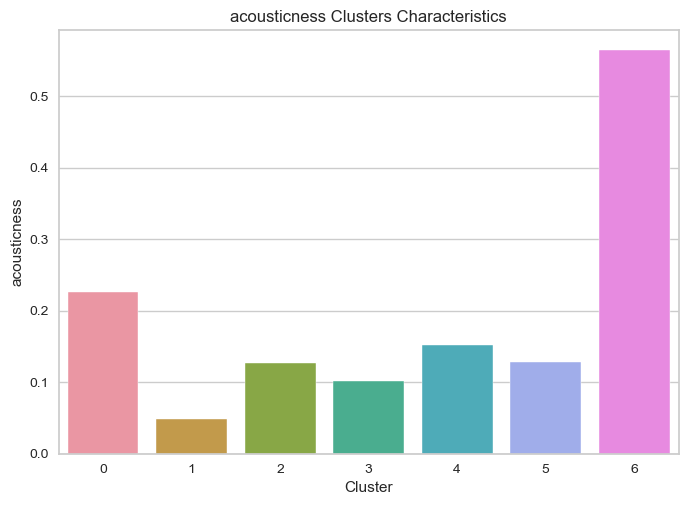

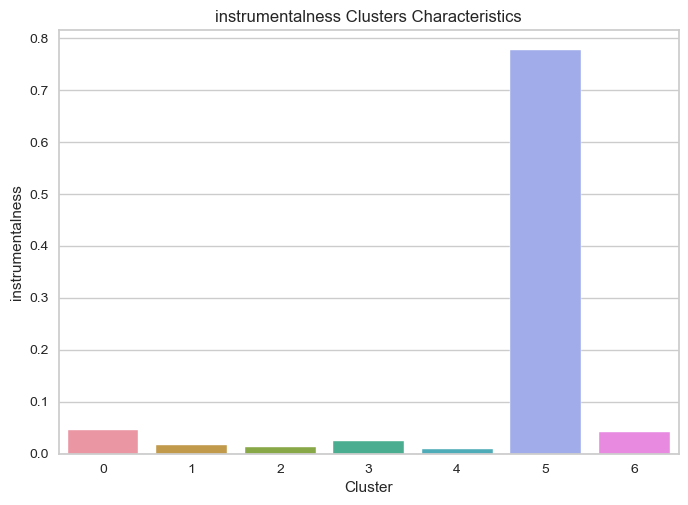

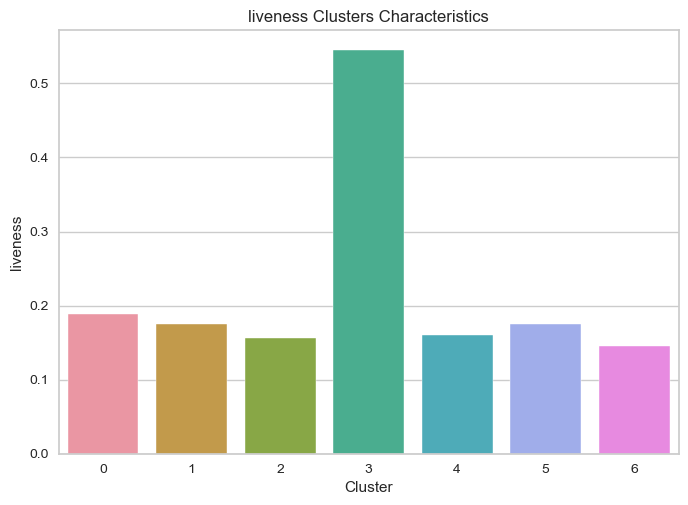

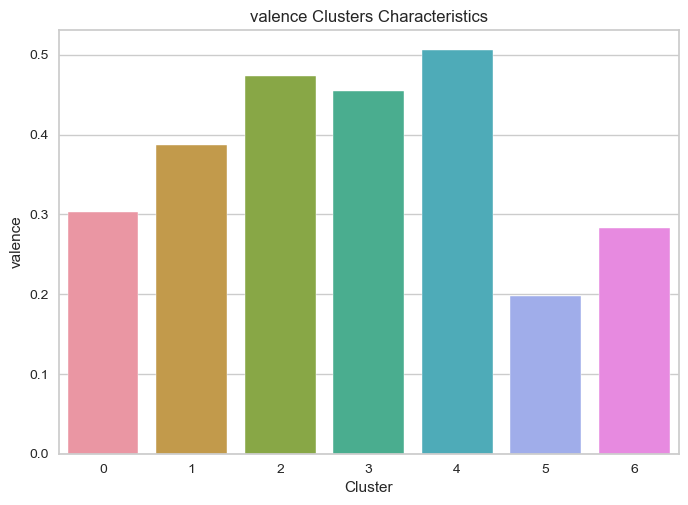

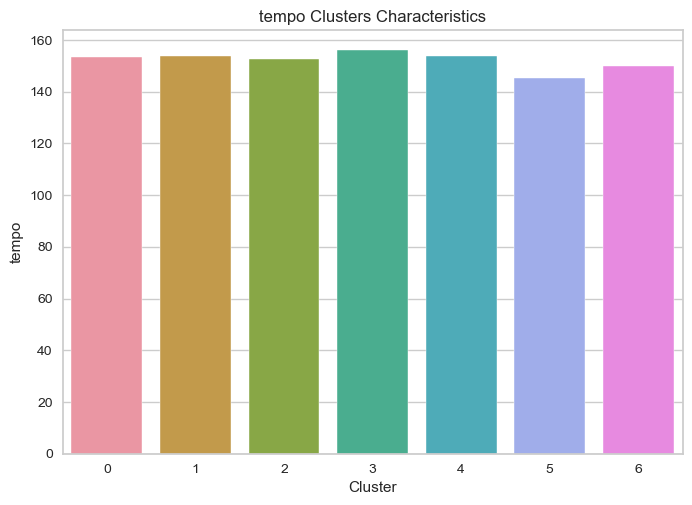

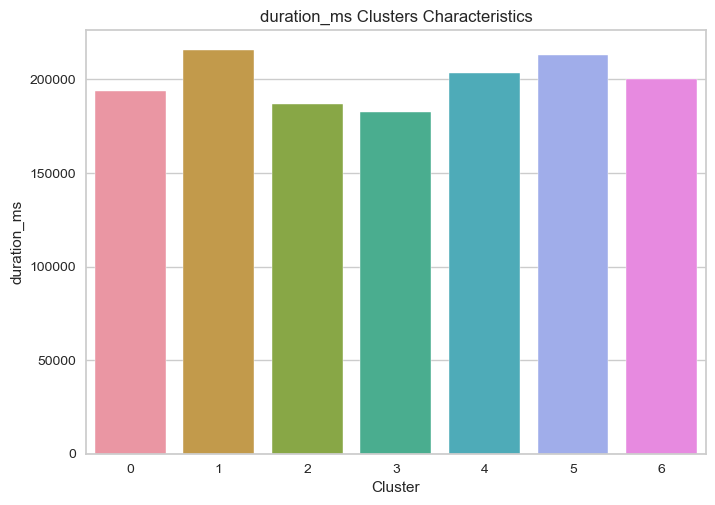

In [51]:
# The overall average score in each cluster of features.
group_data = genre_2.groupby(['cluster']).mean().reset_index()
cols = list(group_data.columns[1:13])
for c in cols:
    sns.set_palette('rainbow')
    sns.set_style('whitegrid')
    sns.barplot(x='cluster',y=c, data=group_data)
    plt.ylabel(c)
    plt.xlabel('Cluster')
    plt.title('{} Clusters Characteristics'.format(c))
    plt.show()

In [54]:
# Let's use the previous standardized data to find correlations.
df_scaled['cluster'] = genre_2['cluster']

<AxesSubplot:>

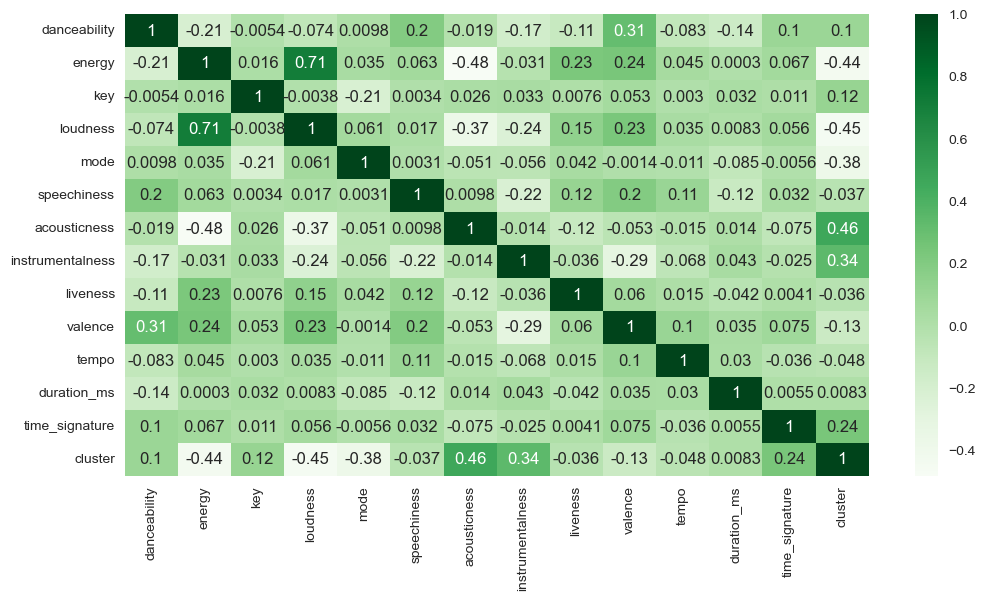

In [55]:
#Energy, loudness, valence, and danceability all share higher correlations between them.
plt.figure(figsize=(12,6))
sns.heatmap(df_scaled.corr(),cmap='Greens',annot=True)

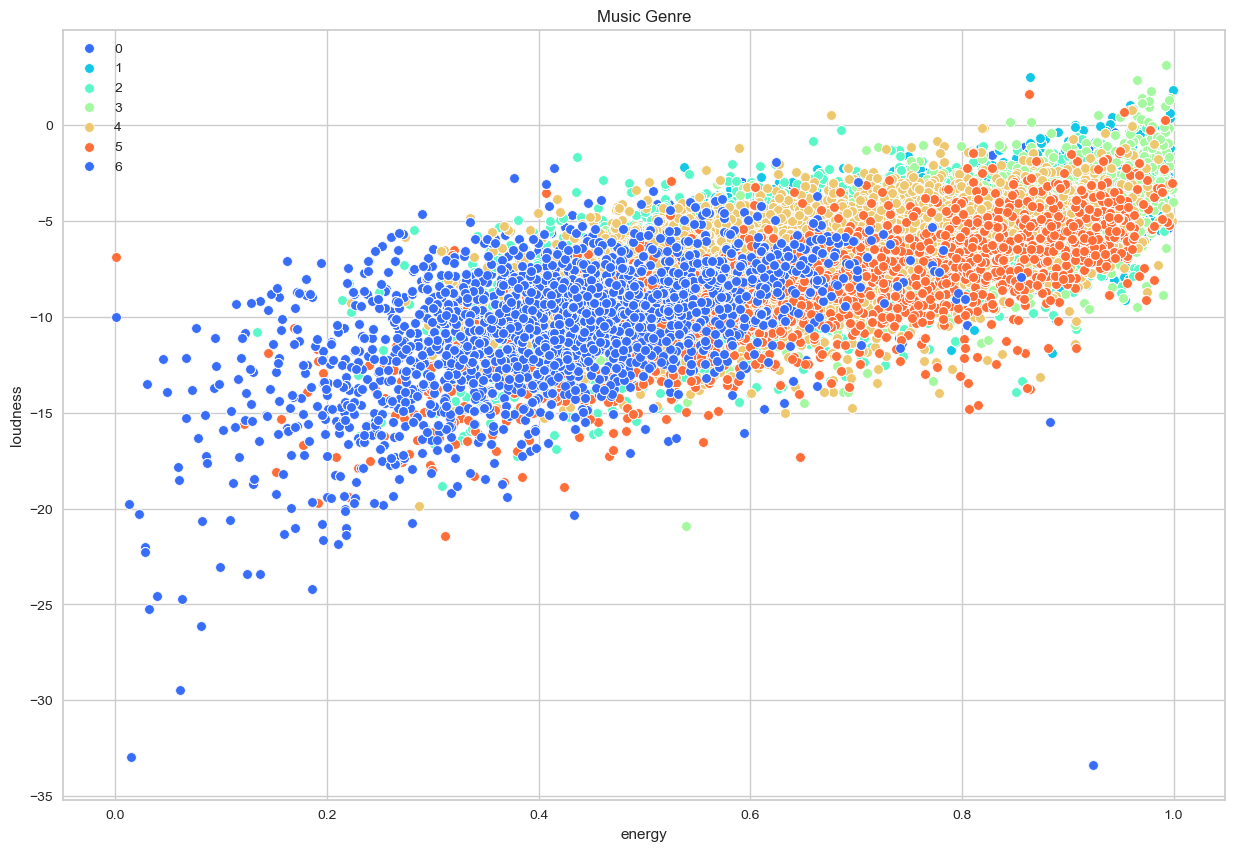

In [56]:
# Comparing energy and loudness separated by clusters
fig,ax = plt.subplots(figsize=(15,10))

for i in range(0,i_knee):
    c_genre = genre_2[genre_2['cluster'] == i]
    sns.scatterplot(x=c_genre['energy'],y = c_genre['loudness'],label=i)
    
    plt.title('Music Genre')
    

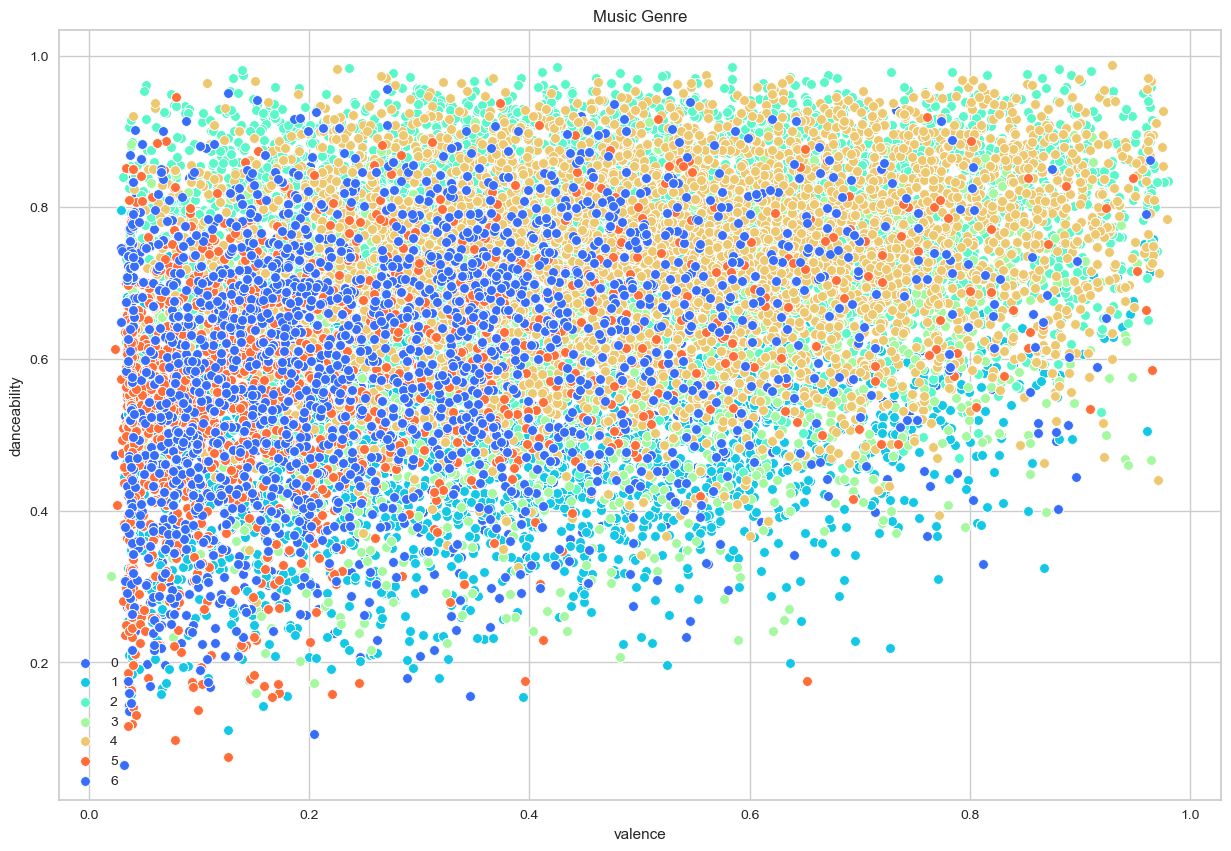

In [57]:
# Corrleation valence and danceability separated by clusters
fig,ax = plt.subplots(figsize=(15,10))

for i in range(0,i_knee):
    c_genre = genre_2[genre_2['cluster'] == i]
    sns.scatterplot(x=c_genre['valence'],y = c_genre['danceability'],label=i)
    
    plt.title('Music Genre')

In [58]:
# The rating scales are according to how many points are in each cluster.
def occurence_scale(genre_2):
    if (genre_2['cluster'] == 0):
        return 'Very Low'
    elif (genre_2['cluster'] == 1):
        return 'Moderate High'
    elif (genre_2['cluster'] == 2):
        return  'Very High'
    elif (genre_2['cluster'] == 3):
        return 'Moderate low'
    elif (genre_2['cluster'] == 4):
        return 'High'
    elif (genre_2['cluster'] == 5):
        return 'Very low'
    elif (genre_2['cluster'] == 6):
        return 'Moderate'

In [59]:
genre_2['Streaming_Scale'] = genre_2.apply(occurence_scale,axis=1)

In [60]:
genre_2['Streaming_Scale'].value_counts()

Very High        23775
High             20718
Moderate High    18578
Moderate         10528
Moderate low      8706
Very low          8023
Very Low          3548
Name: Streaming_Scale, dtype: int64

<AxesSubplot:xlabel='count', ylabel='cluster'>

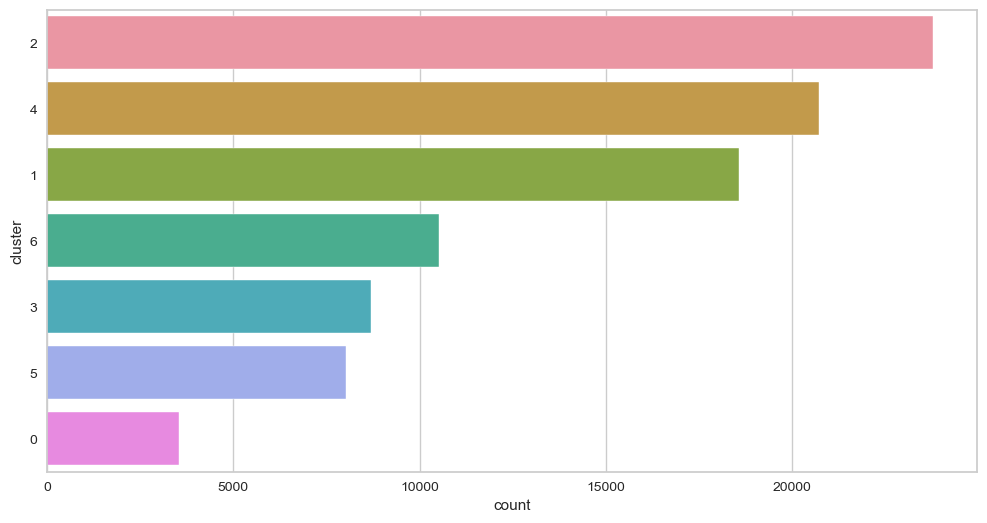

In [61]:
# Under, which points to the cluster classify the most?
plt.figure(figsize=(12,6))
sns.countplot(y='cluster',data=genre_2,order=genre_2['cluster'].value_counts().index)

In [62]:
# High correlated features averages 
group_scaledf = genre_2.groupby(['Streaming_Scale'])[['energy','loudness','valence','danceability']].sum().reset_index()

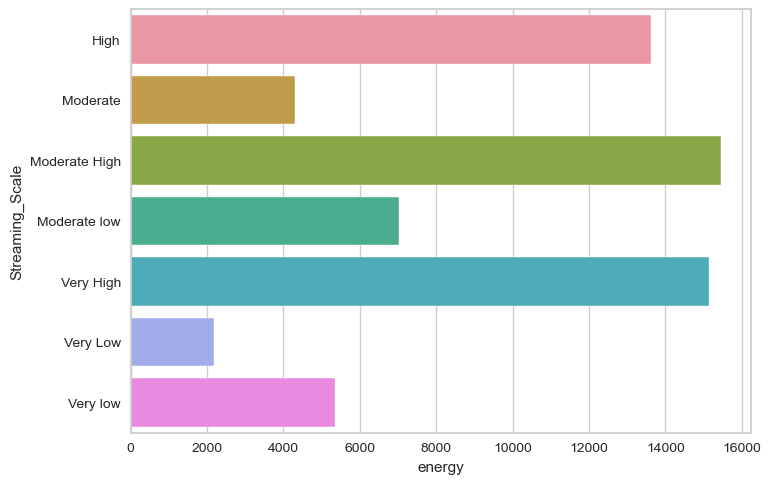

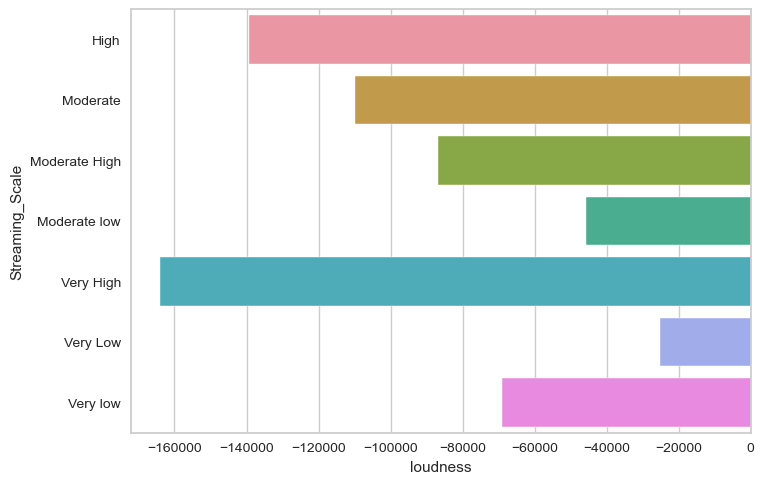

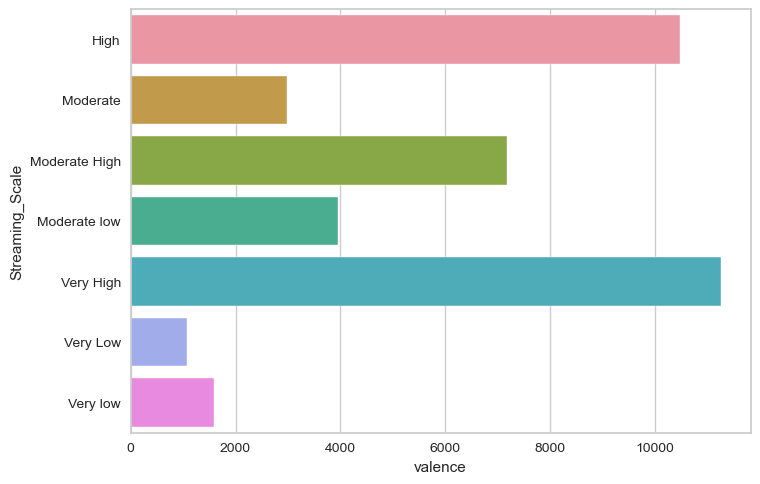

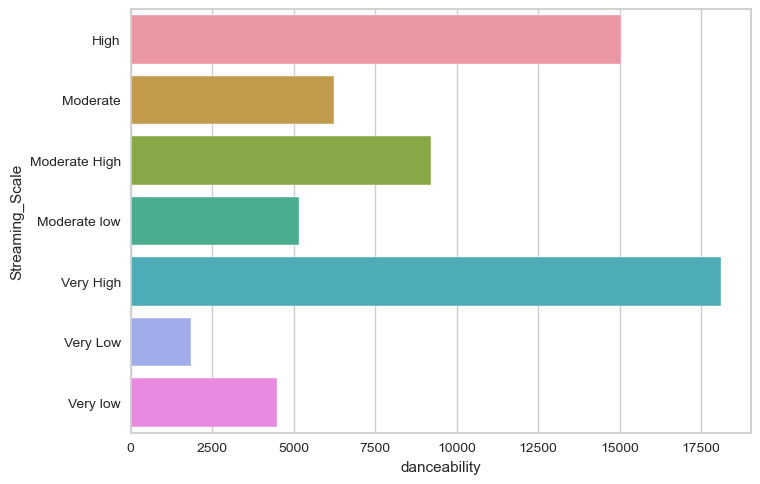

In [66]:
# Genres of music that consist of higher energy, loudness, valance, and danceability are streamed the most.
for i, cols in enumerate(group_scaledf.columns[1:5]):
    plt.figure(i)
    sns.barplot(y='Streaming_Scale',x=cols,data=group_scaledf)
    
    